<a href="https://colab.research.google.com/github/kennc05/household_electricity_forecasting/blob/main/5.%20Recurrent%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM

##1. Import libraries

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount("/content/drive")

full_path = "/content/drive/MyDrive/Kenn @Newcastle Uni/20-21 - Year 3/CSC3032: Dissertation/Code/London Smart Meters/Datasets"

# import libraries needed 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# import tensorflow stuff 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
 

# set pandas display options 
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Features to use based on correlation analysis

In [ ]:
#All features except temperatureLow as it is redundant
all_individual_features = ['day_of_week', 'day_of_month', 'month',
       'Acorn_grouped_Adversity', 'Acorn_grouped_Affluent',
       'Acorn_grouped_Comfortable', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']

all_acorn_features = ['day_of_week', 'day_of_month', 'month', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']

historic_energy_columns = ['energy_sum1(t-7)', 'energy_sum1(t-6)', 'energy_sum1(t-5)',
       'energy_sum1(t-4)', 'energy_sum1(t-3)', 'energy_sum1(t-2)',
       'energy_sum1(t-1)']


#Top 8 from pearson correlations

#For all individual dataset only 
pearson_0 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh']

pearson_1 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']

pearson_2 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh', 'month', 'day_of_week']

pearson_3 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh',  'month', 'day_of_week', 'public_holiday']
             


#----
#For acorn datasets
pearson_4 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh']

pearson_5 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']
        
pearson_6 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month']


pearson_7 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month', 'public_holiday']


#For individual only
mutual_information_0 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex']

mutual_information_1 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'public_holiday']

mutual_information_2 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month']

mutual_information_3 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month', 'public_holiday']                                            


#----
#For acorn datasets
mutual_information_4 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex']

mutual_information_5 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'public_holiday']

mutual_information_6 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month']

mutual_information_7 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month', 'public_holiday']


#Calendar attributes worth considering: 'day_of_week',	'day_of_month',	'month', 'public_holiday'

#For use when iterating through each of the feature selection and household groups
individual_feature_groups_pearson = [historic_energy_columns + pearson_0, historic_energy_columns + pearson_1, historic_energy_columns + pearson_2, historic_energy_columns + pearson_3]
individual_feature_groups_mutual_information = [historic_energy_columns + mutual_information_0, historic_energy_columns + mutual_information_1, historic_energy_columns + mutual_information_2, historic_energy_columns + mutual_information_3]

#All acorn groups
acorn_groups_pearson = [historic_energy_columns + pearson_4, historic_energy_columns + pearson_5, historic_energy_columns + pearson_6, historic_energy_columns + pearson_7] 
acorn_groups_mutual_information = [historic_energy_columns + mutual_information_4, historic_energy_columns + mutual_information_5, historic_energy_columns + mutual_information_6, historic_energy_columns + mutual_information_7]


#Households to test
affluent_1 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_1.csv')
affluent_2 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_2.csv')
affluent_3 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_3.csv')

comfortable_1 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_1.csv')
comfortable_2 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_2.csv')
comfortable_3 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_3.csv')

adversity_1 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_1.csv')
adversity_2 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_2.csv')
adversity_3 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_3.csv')


#Households to test
affluent_households_test = [affluent_1, affluent_2, affluent_3] 
comfortable_households_test = [comfortable_1, comfortable_2, comfortable_3] 
adversity_households_test = [adversity_1, adversity_2, adversity_3]

##3. Helper functions

In [ ]:
def reshape_predictions(household_predictions): 
  #Reshape each of the household predictions before returning
  household_predictions = np.array(household_predictions)
  household_predictions_reshaped = household_predictions.reshape(household_predictions.shape[0], 
                                                                 household_predictions.shape[1])
  return household_predictions_reshaped

#Takes in the data consumption, number of days to use before, number of days ahead to include, 
#How many features to perform this on
def create_sliding_window(input_data, historic_days=1, future_days=1, n_features=1):
  #Just perform sliding scale on consumption data not other features
  consumption_data = input_data['energy_sum']
  energy_values, column_names = list(), list()

	#Go through each of the previous energy consumed and save it to the energy_values list
  for i in range(historic_days, 0, -1):
    energy_values.append(consumption_data.shift(i))
    column_names += [('energy_sum%d(t-%d)' % (j+1, i)) for j in range(n_features)]
  
  #The future energy consumed
  for i in range(0, future_days):
    energy_values.append(consumption_data.shift(-i))
    if i == 0:
      column_names += [('energy_sum%d(t)' % (j+1)) for j in range(n_features)]
    else:
      column_names += [('energy_sum%d(t+%d)' % (j+1, i)) for j in range(n_features)]
      
  #Put it all together and combine into final output
  combined_output = pd.concat(energy_values, axis=1)
  combined_output.columns = column_names
  combined_output.dropna(inplace=True)

  #Final output is the historic energy consumption combined with the original dataset
  final_output = combined_output.merge(input_data, left_index=True, right_index=True)
  final_output.reset_index(inplace=True)
  final_output.drop(['index'], axis=1, inplace=True)
  return final_output

#Run the model and see performance for each group
def run_model(training_dataset, testing_dataset, subset, feature_groups, household_groups):
  training_dataset_subset = training_dataset[:subset]
  testing_dataset_subset = testing_dataset[:subset]
  
  scaler = MinMaxScaler(feature_range=(0, 1))

  household_1_predictions = []
  household_2_predictions = []
  household_3_predictions = []
  model_history = []


  print("-- Model performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))
  
  #Make training and test datasets have prior energy consumption of 7 days
  X_train = create_sliding_window(training_dataset_subset, 7, 1)
  y_train = X_train['energy_sum']

  X_test = create_sliding_window(testing_dataset_subset, 7, 1)
  y_test = X_test['energy_sum']

  X_train.drop(['energy_sum'], axis=1, inplace=True)
  X_test.drop(['energy_sum'], axis=1, inplace=True)

  household_1 = create_sliding_window(household_groups[0], 7, 1)
  household_2 = create_sliding_window(household_groups[1], 7, 1)
  household_3 = create_sliding_window(household_groups[2], 7, 1)

  for i in range(0, len(feature_groups)):

    #Scale the datasets first
    X_train_scaled = scaler.fit_transform(X_train[feature_groups[i]])
    X_test_scaled = scaler.fit_transform(X_test[feature_groups[i]])
    household_1_scaled = scaler.fit_transform(household_1[feature_groups[i]])
    household_2_scaled = scaler.fit_transform(household_2[feature_groups[i]])
    household_3_scaled = scaler.fit_transform(household_3[feature_groups[i]])


    #Reshape to the expected input shape for LSTM 
    #[samples, timesteps, features]
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    household_1_scaled = household_1_scaled.reshape((household_1_scaled.shape[0], 1, household_1_scaled.shape[1]))
    household_2_scaled = household_2_scaled.reshape((household_2_scaled.shape[0], 1, household_2_scaled.shape[1]))
    household_3_scaled = household_3_scaled.reshape((household_3_scaled.shape[0], 1, household_3_scaled.shape[1]))


    # design network
    model = Sequential()
    # define parameters
    #verbose - if output is needed on progress of model 
    verbose, epochs, batch_size = 0, 50, 72 #OR 16??

    n_timesteps, n_features, n_outputs = X_train_scaled.shape[1], X_train_scaled.shape[2], y_train.shape[0]
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(RepeatVector(1))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')

    # fit network
    model_history.append(model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose))
   
    # Make predictions on the test dataset
    y_pred = model.predict(X_test_scaled)
    y_pred = y_pred.reshape(-1)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))
    #Then make predictions for that household
    household_1_predictions.append(model.predict(household_1_scaled))
    household_2_predictions.append(model.predict(household_2_scaled))
    household_3_predictions.append(model.predict(household_3_scaled))

  #Set correct shape for households 
  household_1_predictions = reshape_predictions(household_1_predictions)
  household_2_predictions = reshape_predictions(household_2_predictions)
  household_3_predictions = reshape_predictions(household_3_predictions)

  # plot error history and show outcome
  plt.clf()
  plt.figure(figsize = (25,5))
  for history in model_history:
    plt.plot(history.history['loss'], label='train')
  plt.legend()
  plt.show()
  return household_1_predictions, household_2_predictions, household_3_predictions

#Visualise the results against household prediction against each feature group
def visualise_results (household_data, household_predictions):
  household_data_consumption = household_data['energy_sum'] 
  household_data['day'] =  pd.to_datetime(household_data['day'],format='%Y-%m-%d')

  plt.clf()
  plt.figure(figsize = (25,5))
  plt.plot(household_data['day'], household_data_consumption, label='Actual consumption')

  for i in range(0, len(household_predictions)):
    plt.plot(household_data['day'][7:], household_predictions[i], label='Feature group ' + str(i))

  plt.xlabel('day')
  plt.ylabel('energy used')
  plt.legend()
  plt.show()


#Get the performance metrics 
#MAE, MAPE, MSE, RMSE, R2
def get_performance(household_consumption, household_predictions):
  household_consumption = household_consumption['energy_sum'][7:]
  
  print("-- Household forecasting performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))

  for i in range(0, len(household_predictions)):
    mae = mean_absolute_error(household_consumption, household_predictions[i])
    mape = mean_absolute_percentage_error(household_consumption, household_predictions[i])
    mse = mean_squared_error(household_consumption, household_predictions[i])
    rmse = np.sqrt(mse)
    r2 = r2_score(household_consumption, household_predictions[i])

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))



#Save to .csv file for comparasion between models later
def save_best_results(household_predictions, best_feature_group, acorn_name, household_name):
  best_household_predictions = household_predictions[best_feature_group]
  #best_household_predictions.to_csv(full_path + '/daily/individual_households_test/'+acorn_name+'/'+household_name+'_model1.csv', index=False)
  np.savetxt(full_path + '/daily/individual_households_test/'+acorn_name+'/'+household_name+'_predictions_model4.csv', best_household_predictions, delimiter=",")

##Initial code with full dataset and no subsetting

In [ ]:
#Load dataset
training_dataset = pd.read_csv(full_path + '/daily/daily_comfortable_training.csv')
testing_dataset = pd.read_csv(full_path + '/daily/daily_comfortable_testing.csv')

#training_dataset = training_dataset[:300]
#testing_dataset = training_dataset[:300]


training_dataset_consumption = training_dataset['energy_sum']
testing_dataset_consumption = training_dataset['energy_sum']


#series with shape 300??? did quite good
#Make new dataset to be used to pass into LSTM
new_dataset_train = create_sliding_window(training_dataset, 7, 1)
new_dataset_test = create_sliding_window(testing_dataset, 7, 1)

In [ ]:
#Merge will drop indexes which don't have any data in it and set a new index
#new_dataset_train = new_dataset_train.merge(training_dataset, left_index=True, right_index=True)
##new_dataset_train.reset_index(inplace=True)
#new_dataset_train.drop(['index', 'day_y'], axis=1, inplace=True)

 



new_dataset_train.head()

energy_sum1(t-7)  energy_sum1(t-6)  energy_sum1(t-5)  energy_sum1(t-4)  \
0            23.781            12.108            11.571            11.682   
1            12.108            11.571            11.682             9.041   
2            11.571            11.682             9.041             9.424   
3            11.682             9.041             9.424            10.947   
4             9.041             9.424            10.947             9.288   

   energy_sum1(t-3)  energy_sum1(t-2)  energy_sum1(t-1)  energy_sum1(t)  \
0             9.041             9.424            10.947           9.288   
1             9.424            10.947             9.288           8.371   
2            10.947             9.288             8.371          10.352   
3             9.288             8.371            10.352           9.458   
4             8.371            10.352             9.458          10.615   

       LCLid       day_x  energy_sum  day_of_week  day_of_month  month  \
0  MAC000241  2012-01-08       9.288            6             8      1   
1  MAC000241  2012-01-09       8.371            0             9      1   
2  MAC000241  2012-01-10      10.352            1            10      1   
3  MAC000241  2012-01-11       9.458            2            11      1   
4  MAC000241  2012-01-12      10.615            3            12      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     0.0                        1.0   
1                      0.0                     0.0                        1.0   
2                      0.0                     0.0                        1.0   
3                      0.0                     0.0                        1.0   
4                      0.0                     0.0                        1.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            7.74             9.62      4.46        0.73       3.56   1026.57   
1            9.16            12.33      7.61        0.68       4.05   1029.61   
2            7.10            11.29      7.92        0.72       3.76   1033.21   
3            7.48            11.19      6.53        0.53       3.98   1032.94   
4            2.34            12.40      5.51        0.46       4.35   1027.85   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       13.13      0.75      1.0       0.47                     0.0   
1       12.47      0.84      1.0       0.51                     0.0   
2       12.42      0.87      1.0       0.54                     0.0   
3       13.05      0.84      1.0       0.57                     0.0   
4       13.12      0.81      1.0       0.61                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             1.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             1.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    419  
1                               0.0                0.0               0    419  
2                               0.0                0.0               0    419  
3                               1.0                0.0               0    419  
4                               0.0                0.0               0    419

In [ ]:
#Do the same on the test index
new_dataset_test.head()

energy_sum1(t-7)  energy_sum1(t-6)  energy_sum1(t-5)  energy_sum1(t-4)  \
0             8.012             6.482             6.760             5.886   
1             6.482             6.760             5.886             8.616   
2             6.760             5.886             8.616             7.717   
3             5.886             8.616             7.717             6.064   
4             8.616             7.717             6.064             7.130   

   energy_sum1(t-3)  energy_sum1(t-2)  energy_sum1(t-1)  energy_sum1(t)  \
0             8.616             7.717             6.064           7.130   
1             7.717             6.064             7.130           7.173   
2             6.064             7.130             7.173           7.215   
3             7.130             7.173             7.215           7.191   
4             7.173             7.215             7.191           6.719   

       LCLid       day_x  energy_sum  day_of_week  day_of_month  month  \
0  MAC004867  2013-01-08       7.130            1             8      1   
1  MAC004867  2013-01-09       7.173            2             9      1   
2  MAC004867  2013-01-10       7.215            3            10      1   
3  MAC004867  2013-01-11       7.191            4            11      1   
4  MAC004867  2013-01-12       6.719            5            12      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     0.0                        1.0   
1                      0.0                     0.0                        1.0   
2                      0.0                     0.0                        1.0   
3                      0.0                     0.0                        1.0   
4                      0.0                     0.0                        1.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            8.46            11.23      7.77        0.76       3.71   1024.17   
1            1.16             8.93      5.61        0.52       0.93   1021.19   
2            0.89             3.43      1.46        0.70       1.55   1015.80   
3            1.37             5.70      1.68        0.52       0.40   1017.62   
4            2.12             4.53      0.79        0.57       4.76   1012.97   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       11.73      0.87      1.0       0.88                     0.0   
1        8.64      0.90      1.0       0.92                     0.0   
2        5.21      0.94      1.0       0.95                     0.0   
3        5.70      0.93      1.0       0.99                     0.0   
4       10.03      0.83      1.0       0.03                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             1.0   
3                  0.0               0.0                             1.0   
4                  0.0               0.0                             1.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               0    733  
2                               0.0                0.0               0    733  
3                               0.0                0.0               0    733  
4                               0.0                0.0               0    733

In [ ]:
#These columns will be added to existing features for comparasion to other models

historic_energy_columns = ['energy_sum1(t-7)', 'energy_sum1(t-6)', 'energy_sum1(t-5)',
       'energy_sum1(t-4)', 'energy_sum1(t-3)', 'energy_sum1(t-2)',
       'energy_sum1(t-1)']

In [ ]:
#Using the newly made datasets, make them into X_train, X_test etc

X_train = new_dataset_train
y_train = new_dataset_train['energy_sum']

X_test = new_dataset_test
y_test = new_dataset_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

In [ ]:
feature_group = pearson_1
scaler = MinMaxScaler(feature_range=(0, 1))


#Scale the dataset first
X_train_scaled = scaler.fit_transform(X_train[historic_energy_columns + feature_group])
X_test_scaled = scaler.fit_transform(X_test[historic_energy_columns + feature_group])



#Reshape to the expected input shape for LSTM 
#[samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)





(200921, 1, 16) (200921,) (82366, 1, 16) (82366,)


In [ ]:
# design network
model = Sequential()
# define parameters
verbose, epochs, batch_size = 0, 20, 16



# input needs to be in shape of: [samples, timesteps, features]
n_timesteps, n_features, n_outputs = X_train_scaled.shape[1], X_train_scaled.shape[2], y_train.shape[0]

 
model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(1))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

# fit network
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=72, verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

KeyboardInterrupt: ignored

In [ ]:
#Make a prediction with the test dataset

yhat = model.predict(X_test_scaled, verbose=0)

In [ ]:
#Scale the y data
#https://stackoverflow.com/questions/61866244/inverse-transform-throws-error-in-lstm-prediction

y_test_np = y_test.to_numpy()

#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit_transform(y_test_np.reshape(-1, 1))


scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_test_np.reshape(-1, 1)) 
scaled_test_y = scaler_y.transform(y_test_np.reshape(-1, 1))

In [ ]:
#Load in a household to predict 

#Households to test
affluent_1 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_1.csv')
affluent_2 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_2.csv')
affluent_3 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_3.csv')

comfortable_1 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_1.csv')
comfortable_2 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_2.csv')
comfortable_3 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_3.csv')

adversity_1 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_1.csv')
adversity_2 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_2.csv')
adversity_3 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_3.csv')

In [ ]:

#Make new dataset to be used to pass into LSTM
new_household_1 = create_sliding_window(comfortable_1, 7, 1)

household_1_consumption = comfortable_1['energy_sum']



In [ ]:
#Scale 


scaler = MinMaxScaler(feature_range=(0, 1))

feature_group = pearson_1


household_1_scaled = scaler.fit_transform(new_household_1[historic_energy_columns + feature_group])

household_1_scaled = household_1_scaled.reshape((household_1_scaled.shape[0], 1, household_1_scaled.shape[1]))


#Then make predictions for new household
household_1_predictions = model.predict(household_1_scaled)

household_1_predictions1 = household_1_predictions.reshape(-1)





#household_1_scaled = household_1_scaled.reshape(household_1_scaled.shape[0], household_1_scaled.shape[2])

# invert scaling for forecast
#inv_yhat = np.concatenate((household_1_predictions, household_1_scaled), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)

# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]

# create empty table with 12 fields
# put the predicted values in the right field
#trainPredict_dataset_like = np.zeros(shape=(len(household_1_predictions), 16) )
#trainPredict_dataset_like[:,0] = household_1_predictions[:,0]
# inverse transform and then select the right field
#trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]


In [ ]:
plt.figure(figsize = (25,5))

comfortable_1['day']=  pd.to_datetime(comfortable_1['day'],format='%Y-%m-%d')


plt.plot(comfortable_1['day'], household_1_consumption, label = 'Actual')
plt.plot(comfortable_1['day'][7:], household_1_predictions1, label= 'Predicted')
plt.legend()


## All acorn groups combined


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_training.csv')

X_test = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_testing.csv')


### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.562142425680289      0.9796489653522797      204.15053271026022      14.288125584213635      -3.367406919688632     
1               10.860187300409345      0.9444537303840514      168.90070178919993      12.996180276881354      -2.6133047704623724    
2               11.09118734760835       0.9294472686757397      176.6551716423234       13.29116893438359       -2.779196697588097     
3               11.391436535205505      0.974720605443493       184.48145616294264      13.582395081978092      -2.9466249610220947    


<Figure size 432x288 with 0 Axes>

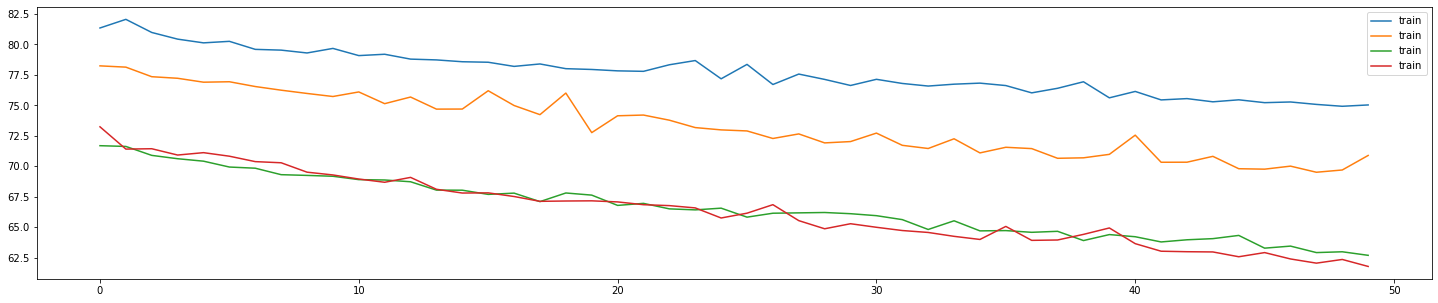

<Figure size 432x288 with 0 Axes>

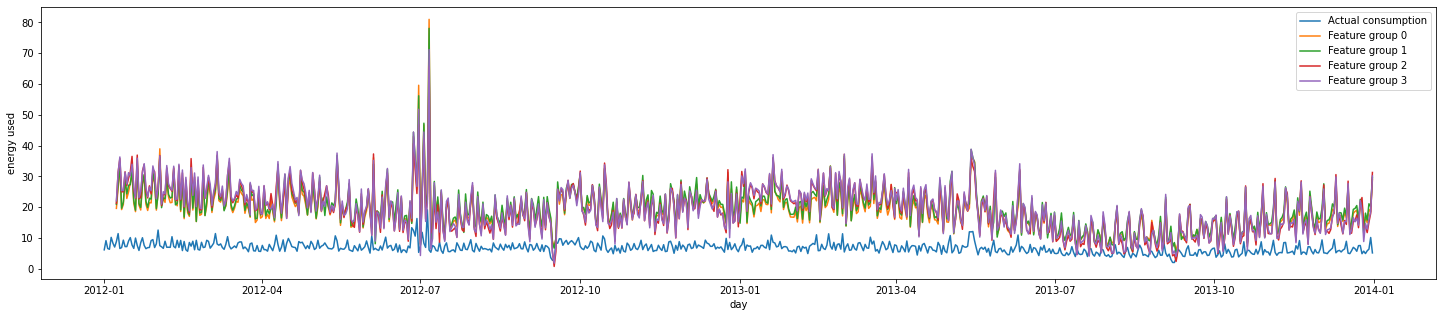

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               12.149849369239726      1.8568070018453324      185.1941705460354       13.608606488029382      -60.361884326620476    
1               12.854846350395501      1.96126721271686        205.3268821923405       14.329231737687143      -67.03261872165743     
2               12.539506130063025      1.8917139175917033      205.53646618511144      14.336543034675808      -67.1020618833034      
3               12.871545682883642      1.9443520525650833      216.4868155721864       14.713490937645846      -70.7303298274002      


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

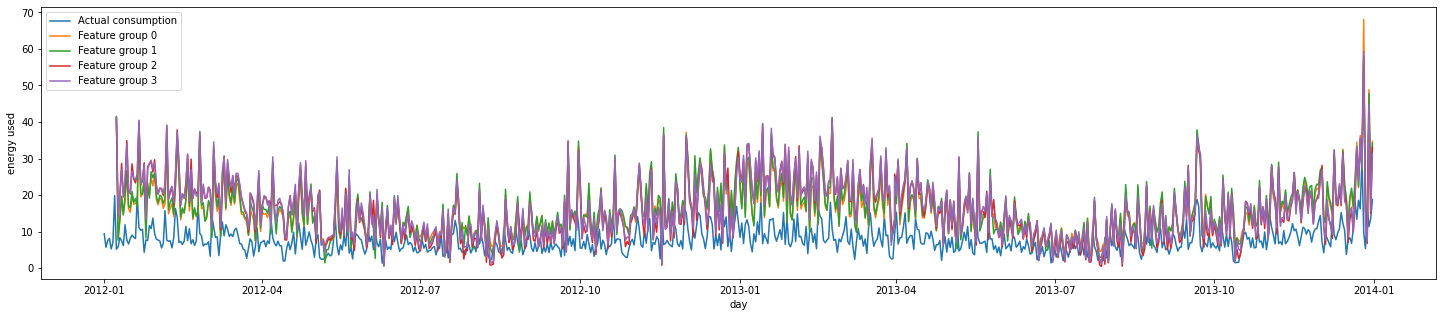

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               8.35481526637162        1.346601045355171       108.56143153471271      10.419281718751668      -8.317076126863489     
1               8.819812570102387       1.3961455254050938      120.65733275345941      10.984413172921865      -9.355183591778857     
2               9.026135591125593       1.3986486197841979      130.49512954284154      11.423446482688206      -10.199493585775006    
3               9.26527552592478        1.448260204976008       134.86354511135482      11.613076470572077      -10.574404452647645    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

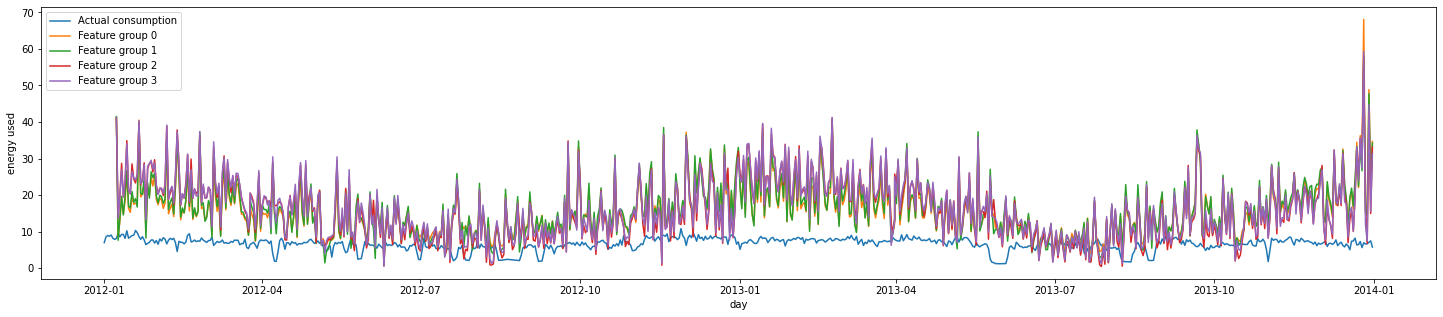

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.292121049108584       1.6525202223558397      131.4628952416416       11.465726982692445      -44.70747773443262     
1               9.752037631618089       1.708495507148728       144.11230766507683      12.004678574000923      -49.1054695452404      
2               9.832345961098172       1.6824311672762617      152.81040398400972      12.361650536397223      -52.12965399742979     
3               10.088459172064937      1.7292609284111748      156.90889120657278      12.526327921884082      -53.554630323455655    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Affluent households - mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.283179853239016       0.7688679426076721      131.26413795879776      11.457056251882408      -1.808143073728087     
1               9.339001685709604       0.761870802936848       137.34297952431902      11.719342111412185      -1.9381881652813266    
2               10.498553147986708      0.8940963673210491      158.62375632814627      12.594592344659127      -2.3934493425876417    
3               9.793896483115166       0.8072752343376925      148.47348872667217      12.18496978767991       -2.1763039432058777    


<Figure size 432x288 with 0 Axes>

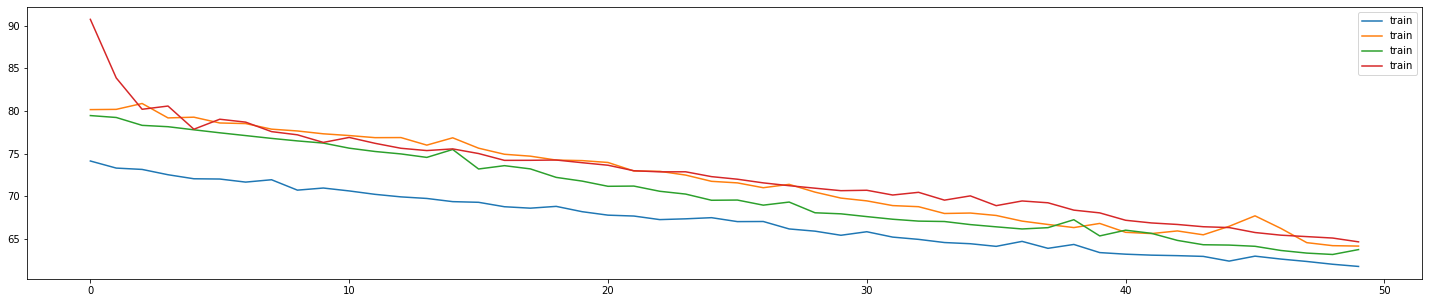

<Figure size 432x288 with 0 Axes>

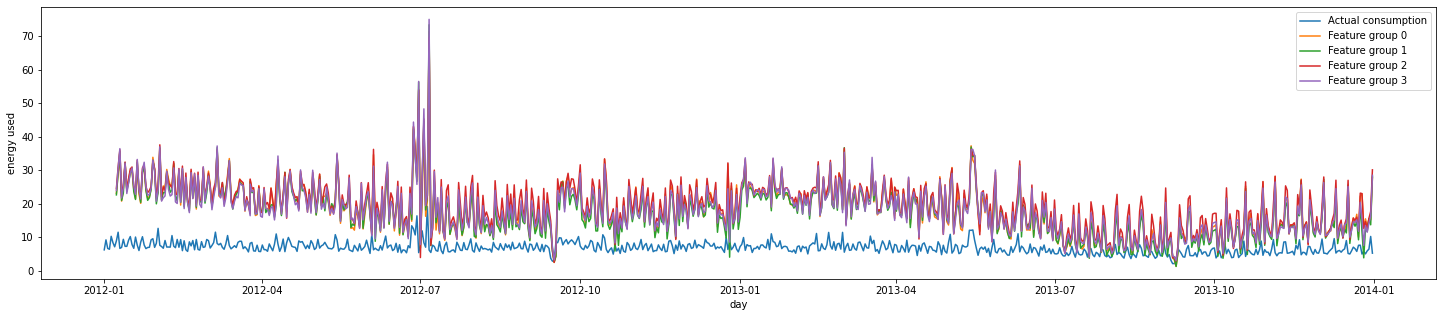

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.402323424486228      1.7172171794527664      175.5563234150396       13.249766919272188      -57.16849838436261     
1               10.811721561811323      1.625917981506608       162.71729913180317      12.756069109714135      -52.91444049143996     
2               12.681484413306103      1.9178379528767373      207.10935210014273      14.391294316361636      -67.62321891158649     
3               11.380667674691406      1.7183804643574612      175.36261873546025      13.242455162675094      -57.10431664415541     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

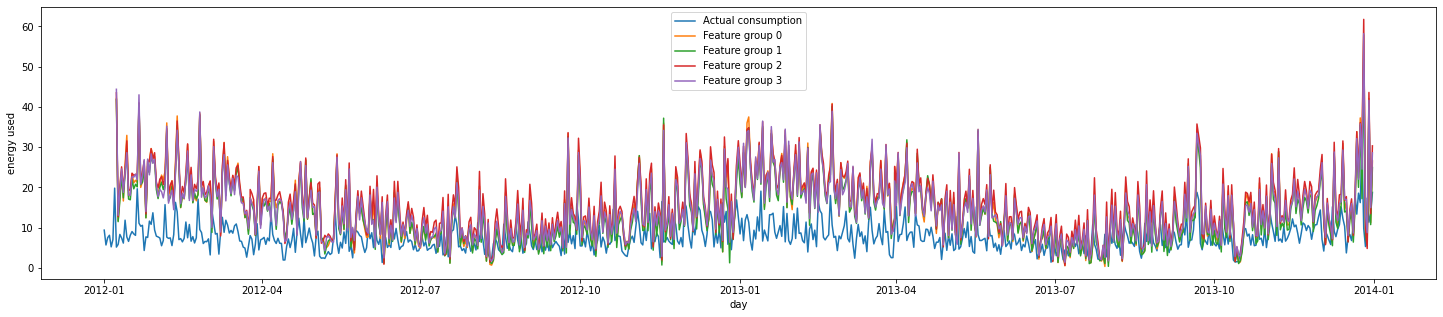

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               8.002831362189248       1.239245987105323       107.21415019347889      10.354426598971035      -8.201448296213849     
1               7.420424231513665       1.1489950811366152      93.63408540369518       9.676470710114053       -7.035965346463907     
2               9.014793487459038       1.4183226081915536      127.25088846481735      11.280553553120402      -9.921062833061654     
3               7.844221802129752       1.2329198681270022      101.84002418616294      10.091581847567948      -7.740224264643214     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

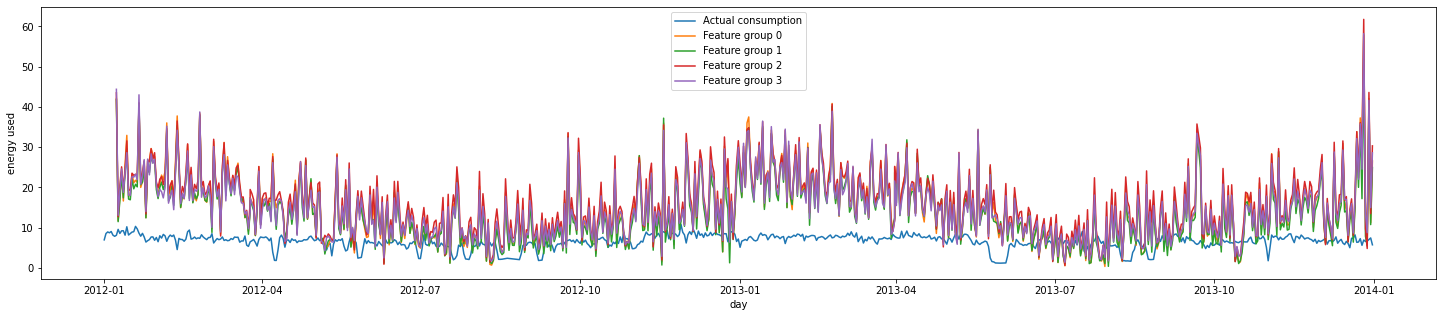

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               8.77435286289043        1.5136274918737085      127.178589963273        11.277348534264293      -43.21789553895        
1               8.068456331028425       1.3924627593453973      109.75191635849414      10.476254882279934      -37.15892890572962     
2               9.871696885206813       1.727516697987221       149.42562590386956      12.223977499319506      -50.95282255423336     
3               8.58379664828035        1.486461147635002       119.77574171587979      10.944210419938013      -40.644047451874485    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Comfortable households - pearson



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               12.028184076591662      1.0243721508880035      207.8799542569967       14.4180426638638        -3.4471907010651384    
1               10.29003019369975       0.8610540657549013      161.70930329287276      12.71649728867477       -2.459458669067805     
2               11.192683104720157      0.940818502251249       181.56604175603917      13.474644401840042      -2.8842552924964626    
3               10.43842480051193       0.8778929850893532      158.98446626402173      12.608904245176173      -2.4011660359953377    


<Figure size 432x288 with 0 Axes>

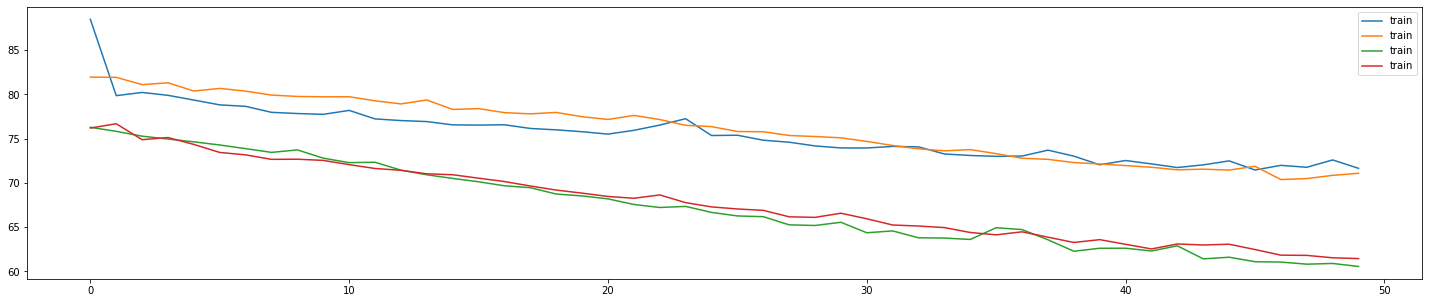

<Figure size 432x288 with 0 Axes>

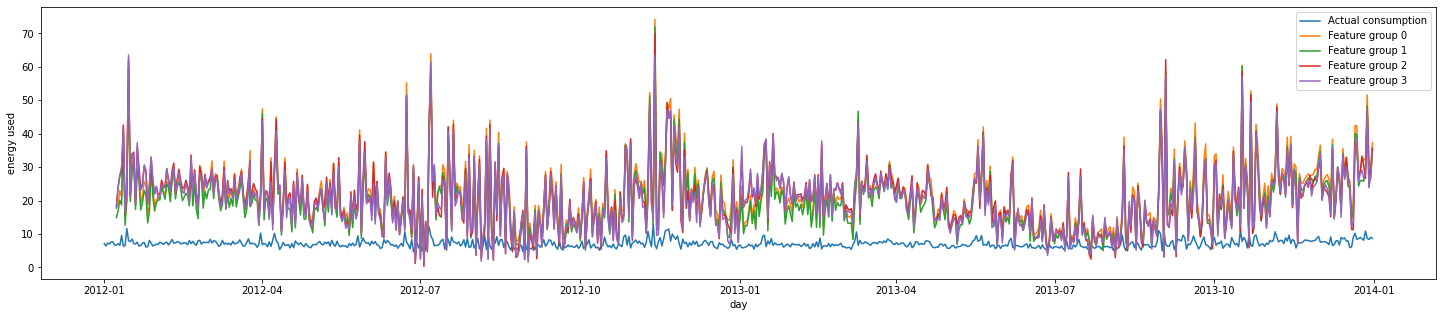

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               14.707109761596149      2.0837215026228546      299.1698456783068       17.2965269831347        -216.8186221340926     
1               12.799027710059272      1.8105417189573896      241.26901419712212      15.532836643611562      -174.66237037330748    
2               13.883616510724327      1.9695798661513237      272.8575207137781       16.518399459807785      -197.6612289284922     
3               13.415416984838654      1.9013746013118227      258.31655504581244      16.072229311636033      -187.07428926178133    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

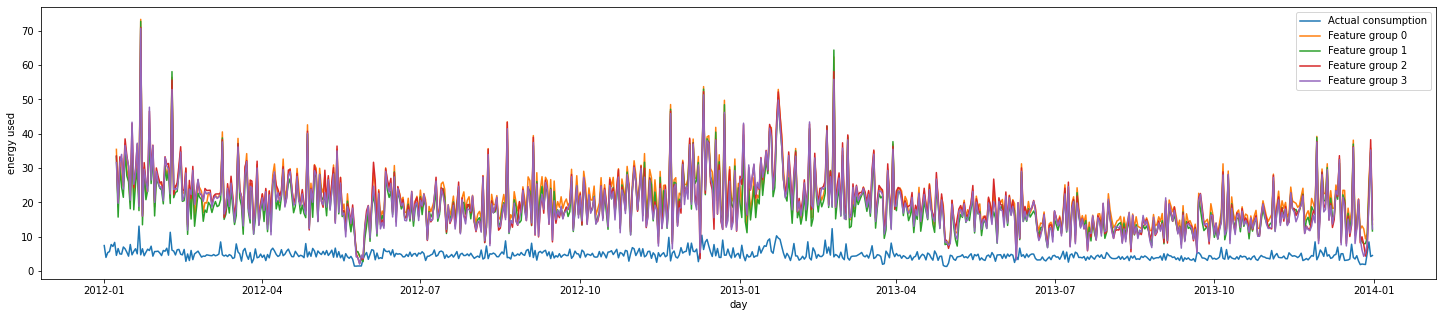

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               16.214938703041565      3.6377599919370023      319.69222058955773      17.879939054413963      -164.92267197777903    
1               14.208877004261979      3.1855281453370257      259.2444984877868       16.101071345962875      -133.54984861786122    
2               15.334966195183817      3.429653404068744       299.52943656015543      17.306918748297036      -154.45803510141147    
3               14.65137568280566       3.277392133359506       276.12402323882696      16.616979967455787      -142.31044918312602    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

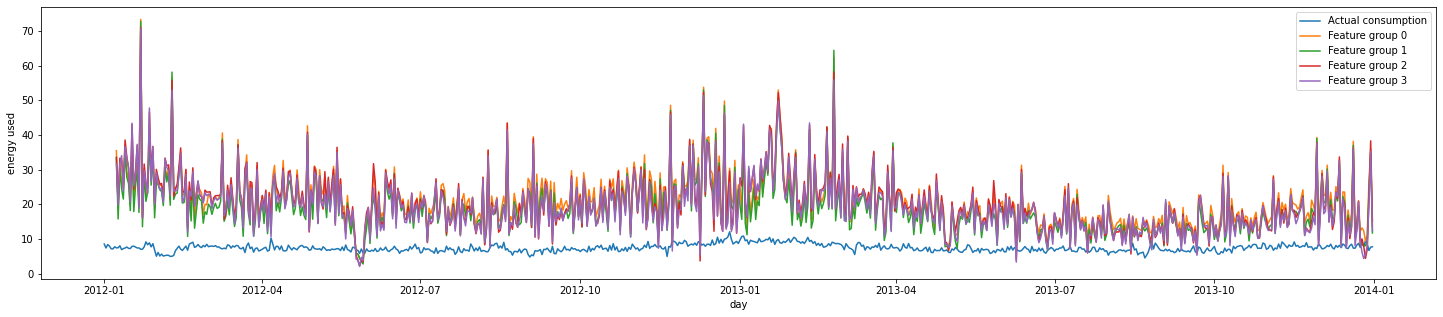

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               13.582010137304646      1.859324865545588       241.12785085659823      15.528291949103682      -212.8753759490357     
1               11.588014112663194      1.5858182288754388      191.43856882378145      13.836132726444244      -168.80201885796058    
2               12.761000969882653      1.741579138359088       225.5121500457022       15.017061964502318      -199.02457493300426    
3               12.101368160587837      1.651749503198679       205.66239246953953      14.340934156098044      -181.41825385056822    


In [ ]:
visualise_results(comfortable_households_test[2], household_2_predictions)

get_performance(comfortable_households_test[2], household_2_predictions)

#### Comfortable households - mutual information



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.960347367899928       0.8284073586765628      151.40701419093372      12.304755755029586      -2.2390610628744407    
1               9.75907991288928        0.8085062631365563      142.01269483632893      11.916907939408148      -2.0380877183018073    
2               9.417139908347634       0.7574696285417961      141.63415753295104      11.901014979107918      -2.0299896427485136    
3               9.056764043352308       0.7340920171168346      130.2686536759742       11.413529413637756      -1.7868466074023521    


<Figure size 432x288 with 0 Axes>

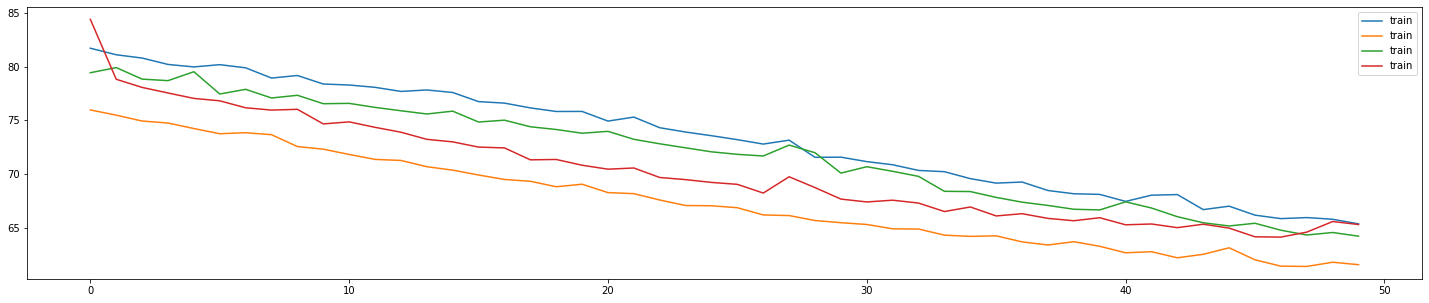

<Figure size 432x288 with 0 Axes>

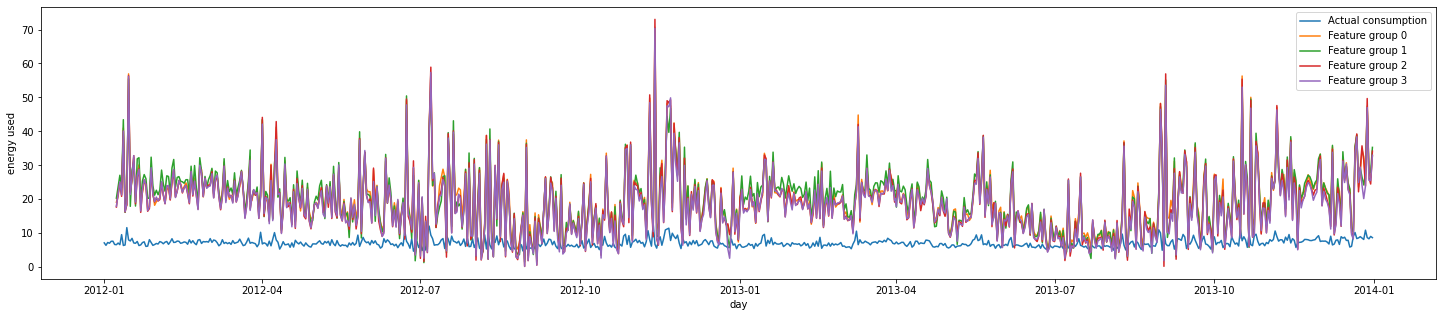

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               12.795126361330494      1.815326823606565       234.19085185116833      15.30329545722647       -169.5089246243168     
1               13.09971900012389       1.8581360839636687      244.7166919712734       15.643423281726843      -177.17254455421565    
2               12.134378982338744      1.717138001971493       222.4890726003998       14.916067598412116      -160.98913070210287    
3               11.760444523675762      1.6654486628514056      208.2220693710102       14.429901918274089      -150.60165672937543    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

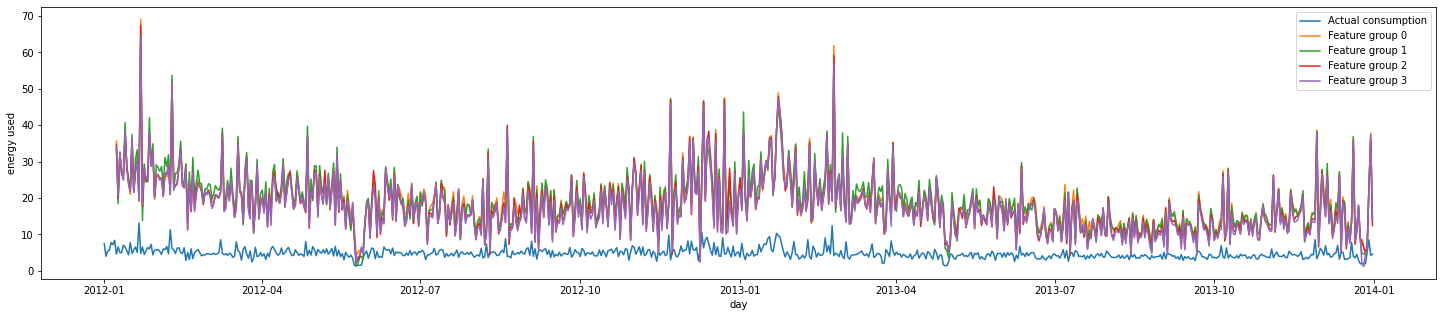

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               14.33788699898162       3.2126865655212464      257.9745315941372       16.06158558779728       -132.89072622842968    
1               14.39355840354564       3.215861407391279       265.7384398458008       16.301485817121115      -136.9202531269282     
2               13.277217791818527      2.971311812836927       235.19966054174523      15.336220542941643      -121.07039650006318    
3               12.960721867801539      2.9004607167092002      225.48923443620853      15.016298959337767      -116.03061216467276    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

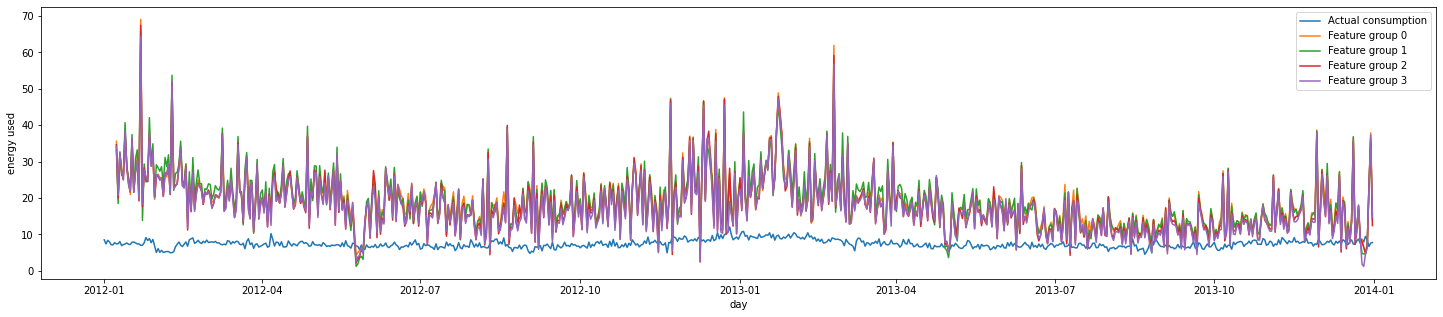

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.737111878440869      1.6070515883553647      189.66145781940202      13.771763061402197      -167.2257584516467     
1               11.87641277584341       1.6240825853750889      196.9659373631398       14.034455363965494      -173.70467950111953    
2               10.758180802467253      1.4692954569396113      172.35180476395524      13.128282628126012      -151.87245711532472    
3               10.477398896591534      1.431295727428696       164.57072830221978      12.828512318356317      -144.9708045371181     


In [ ]:
visualise_results(comfortable_households_test[2], household_2_predictions)
get_performance(comfortable_households_test[2], household_2_predictions)

#### Adversity households - pearson


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.141455896911499      0.944749414798276       182.28571472644214      13.501322702848123      -2.8996513077266144    
1               10.894927573322072      0.9147909756028317      176.85134769751502      13.298546826533906      -2.783393505940966     
2               11.165191882456014      0.920199357713574       182.7647149406338       13.519050075380067      -2.9098985935025574    
3               10.529157586646576      0.8687024461432306      166.53336706578344      12.904780783329233      -2.5626602097306006    


<Figure size 432x288 with 0 Axes>

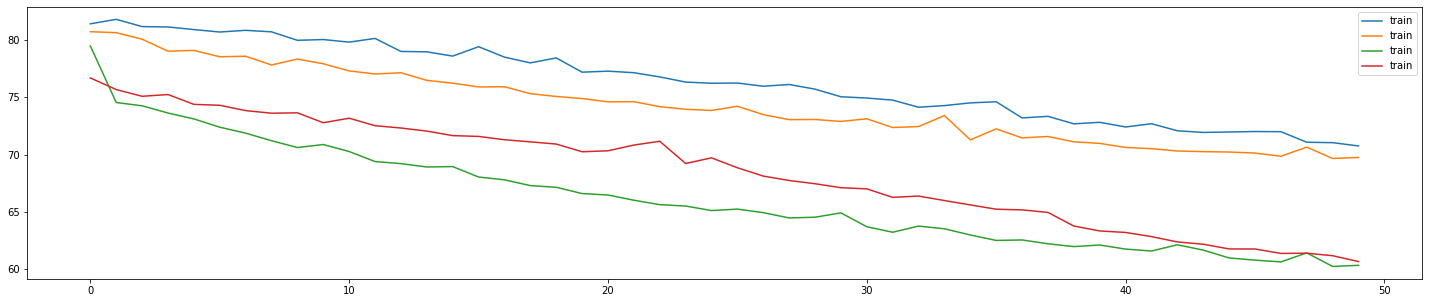

<Figure size 432x288 with 0 Axes>

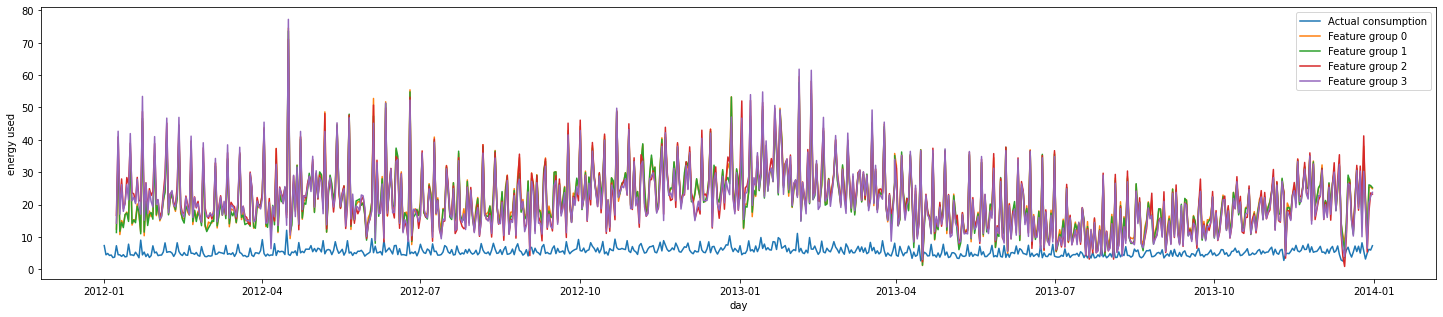

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               16.016327534606347      3.045222562448769       339.84861706317093      18.434983511334394      -188.94138754912535    
1               15.69594799344176       2.9809609860439132      329.23952980296104      18.144958798601916      -183.01196882072884    
2               15.78723000924458       3.0168511610156385      342.2770782412764       18.500731829883822      -190.2986544692164     
3               15.37075336943982       2.9392466263326877      329.2360074506455       18.144861736884234      -183.01000017806663    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

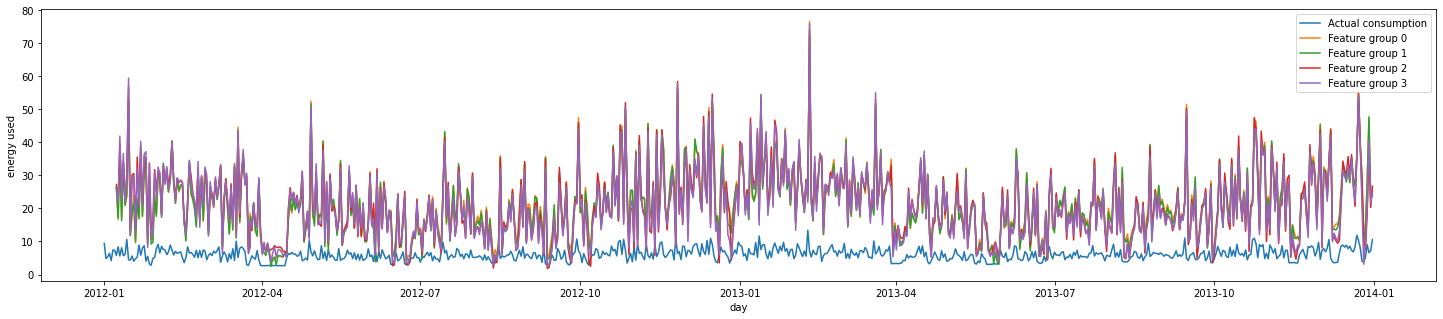

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               15.515336939464168      2.718065737370111       333.3514956858039       18.25791597323758       -101.90739296963977    
1               15.126405925284967      2.639730911434421       322.21955017427564      17.95047492893365       -98.47090174012031     
2               15.124605539203868      2.6420868070059282      329.9833010186432       18.165442494435503      -100.86761322754302    
3               14.72577127831192       2.56648585307127        316.8611876562893       17.80059514893503       -96.81674651823423     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

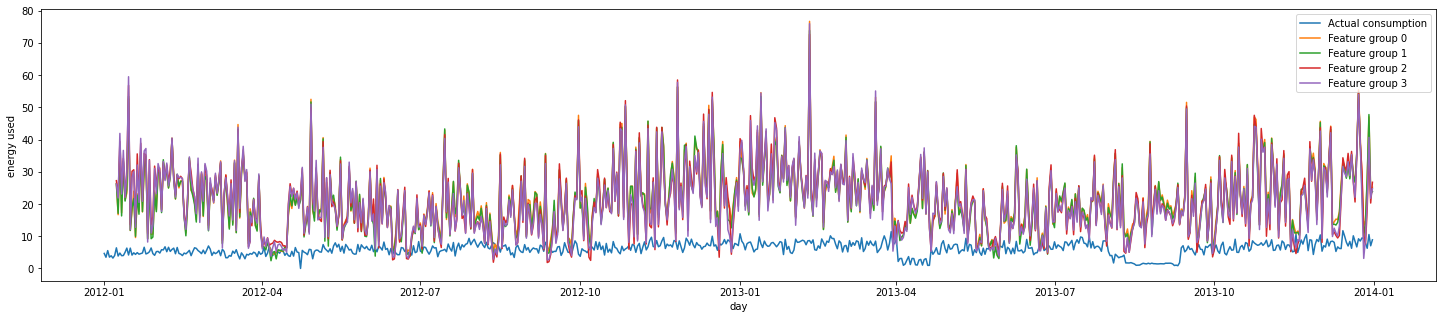

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               15.473065883234511      10.55649360201926       334.2822444785718       18.283387117232184      -85.702203733866       
1               15.115445434031734      10.323671715150859      323.76552923422344      17.993485744408265      -82.97450161152071     
2               15.15838824743607       10.933531820670225      332.7651581127301       18.241851827945816      -85.30871968454639     
3               14.77011774258837       11.013891754402817      320.1008901221371       17.891363562404546      -82.0240105454971      


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_2_predictions)

get_performance(adversity_households_test[2], household_2_predictions)

#### Adversity households - mutual information 


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.40459556942464        0.7682348401205945      138.966471723605        11.788404121152489      -1.9729196497946941    
1               9.474524947716672       0.7749874048508664      143.39615692174232      11.974813439955645      -2.0676842214543933    
2               9.660126020783617       0.8060574251068211      149.16348059751246      12.213250206129098      -2.191064988554281     
3               9.076597916012902       0.729822172384033       132.50595145727965      11.511122945103125      -1.8347092785487713    


<Figure size 432x288 with 0 Axes>

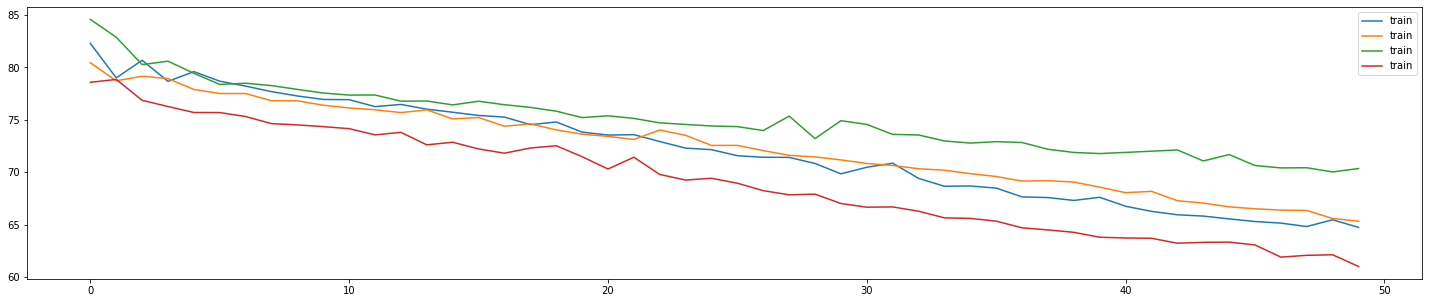

<Figure size 432x288 with 0 Axes>

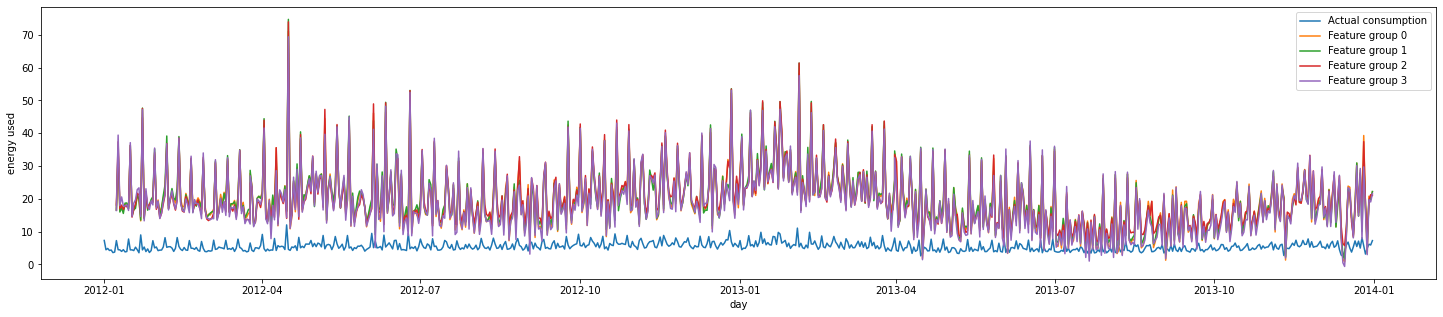

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               14.083545873004583      2.688269710065453       275.74795602650016      16.60566036104858       -153.11552894968239    
1               14.224095478084875      2.7161397388446136      280.89963700849955      16.76006076983313       -155.99480338189088    
2               14.37968814211255       2.7511861251786636      281.81929715031634      16.78747441249923       -156.50880142290052    
3               13.46828823326582       2.5817676492383073      264.30044800357604      16.257319828421167      -146.71751686817439    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, individual_feature_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

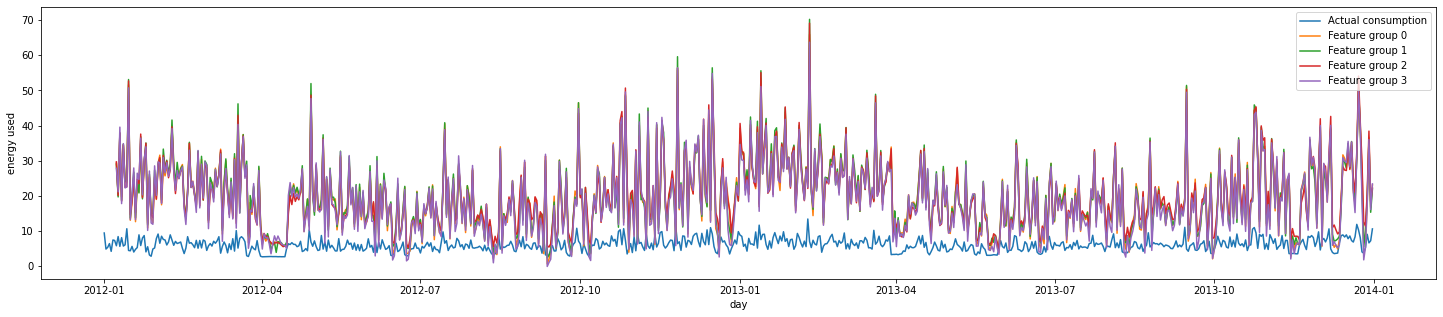

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               13.604647626207086      2.3769879789618993      274.4547539658943       16.566676008357692      -83.72565320473184     
1               13.858505443206695      2.4277140686119094      283.5953128975468       16.840288385225083      -86.54739272627367     
2               14.007158685368193      2.4607828201529713      278.2248244223943       16.680072674373882      -84.88949415643391     
3               13.11193558947519       2.2860731871814797      264.32138585882353      16.257963767299504      -80.59742817080782     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

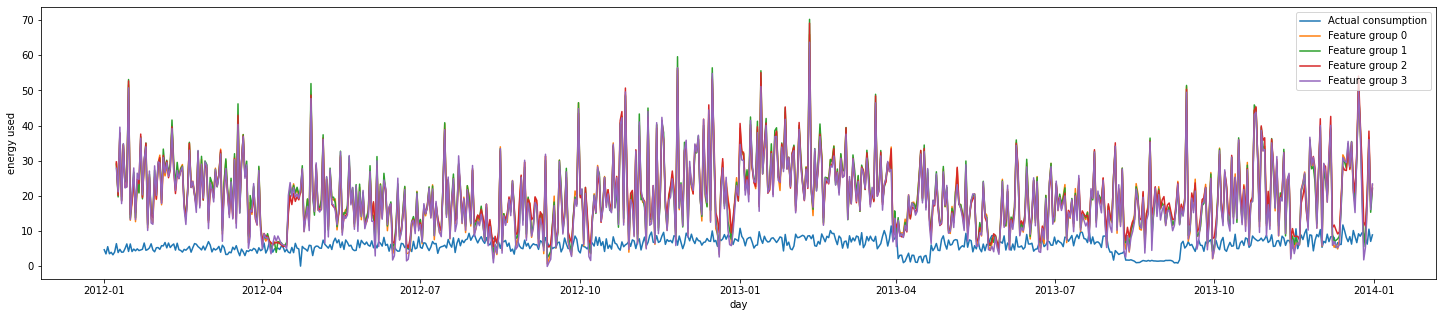

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               13.660683071064225      9.973547441670423       277.01603053800545      16.643798560965745      -70.84916552991672     
1               13.861141094833036      9.993624740589592       285.7260949089157       16.903434411648885      -73.10827976076591     
2               13.945489268321307      10.122149952612848      279.8316837707435       16.728170365307243      -71.57945660657731     
3               13.258073001473978      10.36408134879084       267.28558934538205      16.348871194837336      -68.32539793939094     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_2_predictions)

get_performance(adversity_households_test[2], household_2_predictions)

## Affluent dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_affluent_training.csv')
X_test = pd.read_csv(full_path + '/daily/daily_affluent_testing.csv')

### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.24404652238814       0.9671183712038395      185.45521788511468      13.618194369486531      -2.9674567150571325    
1               11.670579239448749      1.0251722484363495      192.06137981063662      13.858621136701755      -3.108782808714972     
2               10.136373782604231      0.8335048849361286      160.82748584647658      12.681777708447525      -2.4405938854879414    
3               9.846048962946009       0.849026544500718       143.38432569745152      11.97431942523046       -2.067431115228561     


<Figure size 432x288 with 0 Axes>

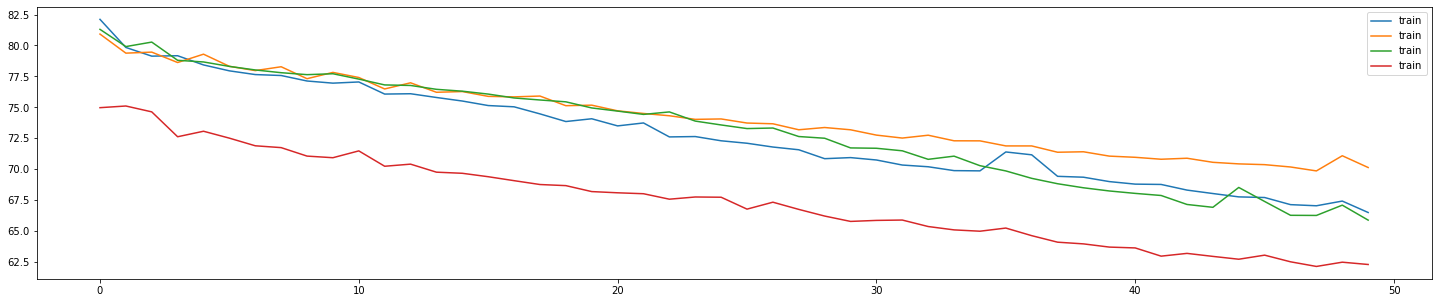

<Figure size 432x288 with 0 Axes>

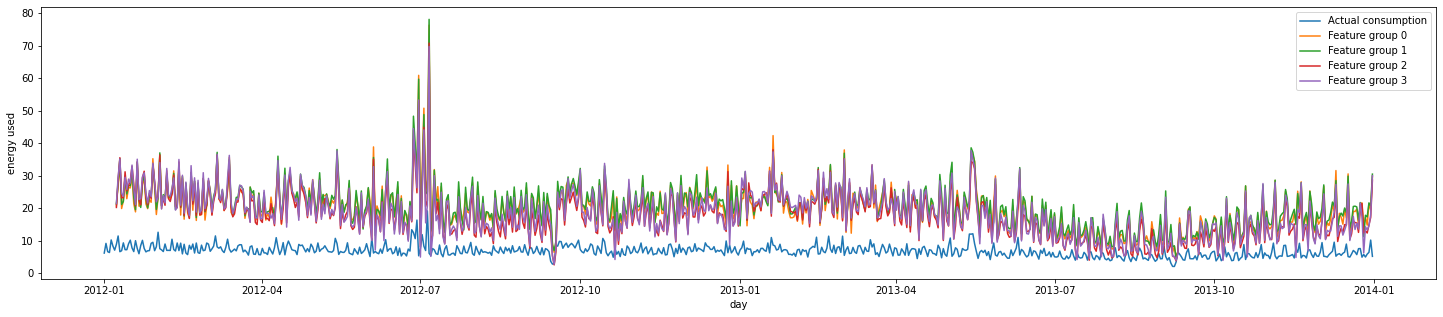

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               13.11054464909937       1.999730871173539       212.55088335324172      14.57912491726584       -69.42620553005216     
1               13.73865725553678       2.100948650018881       228.6763569627549       15.122048702565236      -74.7691892936418      
2               10.988495179760319      1.6586688390120004      164.05041086276876      12.808216537159604      -53.356151197499344    
3               11.771788169777892      1.7803539228931657      184.9103180364293       13.598173334548626      -60.26783317582606     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

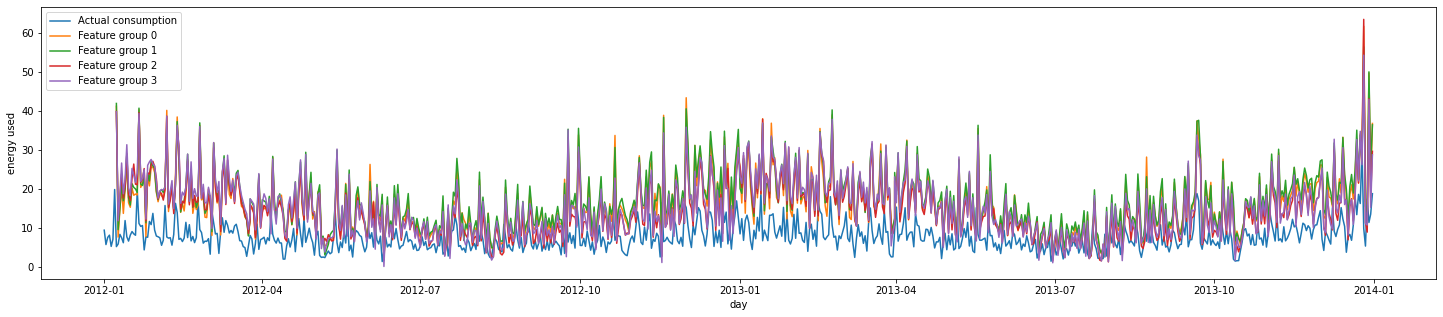

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               8.688141380290547       1.3894417805518575      118.69882284387772      10.894898936836345      -9.187098244479854     
1               9.479249190329009       1.5103665012769967      132.31474888372895      11.50281482436925       -10.355658917065245    
2               7.457243374979529       1.1765500958085346      94.39000433721544       9.715451833919792       -7.100840635503312     
3               8.258757961375023       1.2991739428175983      109.9619465260287       10.486274196588067      -8.437272633177358     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

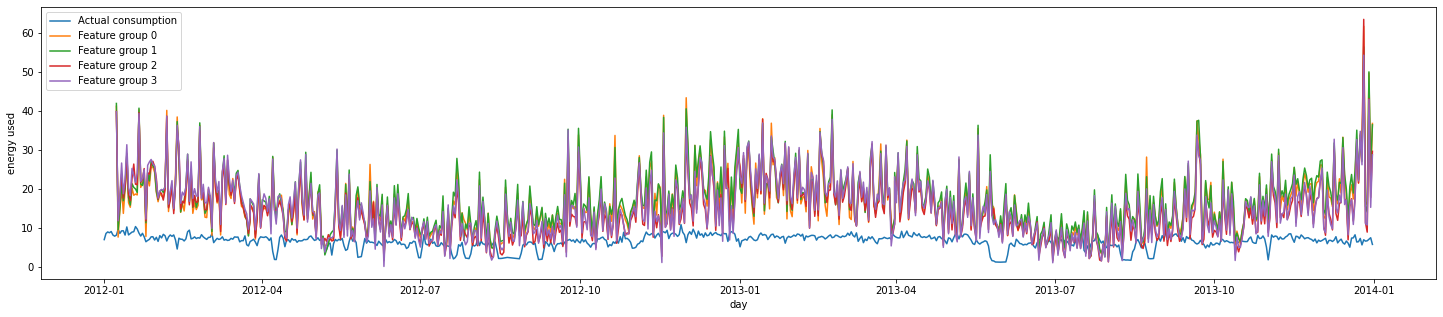

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.64721505351106        1.710410898022891       142.62106075824286      11.942405986996208      -48.58698762176406     
1               10.441978018487452      1.845009840407124       157.89741578996336      12.565723846637859      -53.89832399688506     
2               8.257576456427246       1.4379575787562         112.66888256730127      10.614559932814043      -38.17310988657653     
3               9.039191631690693       1.5607127848333124      128.7419996687551       11.346453175717738      -43.76146727584025     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Affluent households - mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.639639410780566       0.7975463606186969      141.12635817932025      11.879661534712184      -2.019126254926704     
1               10.747497933648935      0.8958688170374355      172.8470959877975       13.147132614672962      -2.6977302632688764    
2               10.15097377921356       0.8140994866948976      162.6822356480001       12.754694651303891      -2.4802726803944504    
3               10.372113627695922      0.862860871005146       159.84231594007454      12.642876094468162      -2.4195180753532908    


<Figure size 432x288 with 0 Axes>

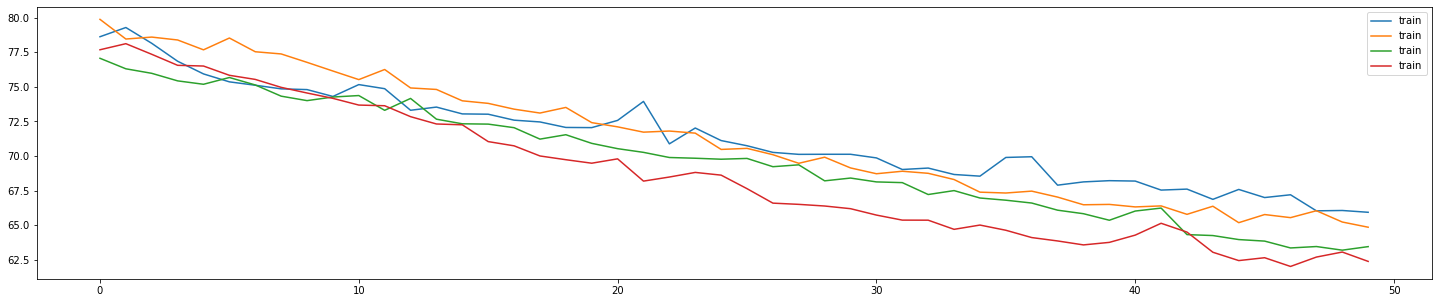

<Figure size 432x288 with 0 Axes>

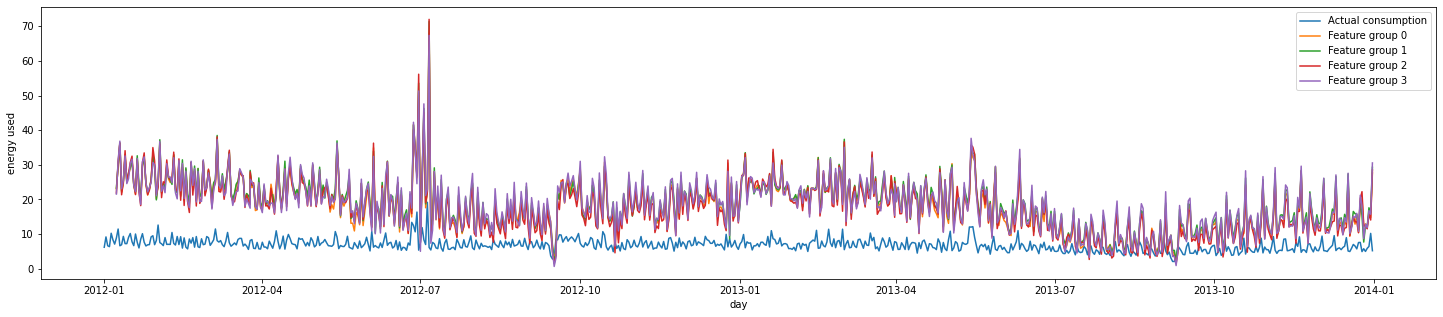

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               11.35628404442713       1.7087485983757016      172.81070123963707      13.145748409262863      -56.258769153496914    
1               11.928591643200571      1.799971670571167       187.8374501391811       13.70538033544422       -61.23770356088306     
2               10.989928544054438      1.6481557492859973      169.7246898934503       13.027842871843761      -55.23625602202511     
3               11.824406146840753      1.784629818582002       186.91766817508312      13.671783650097858      -60.932944753841326    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

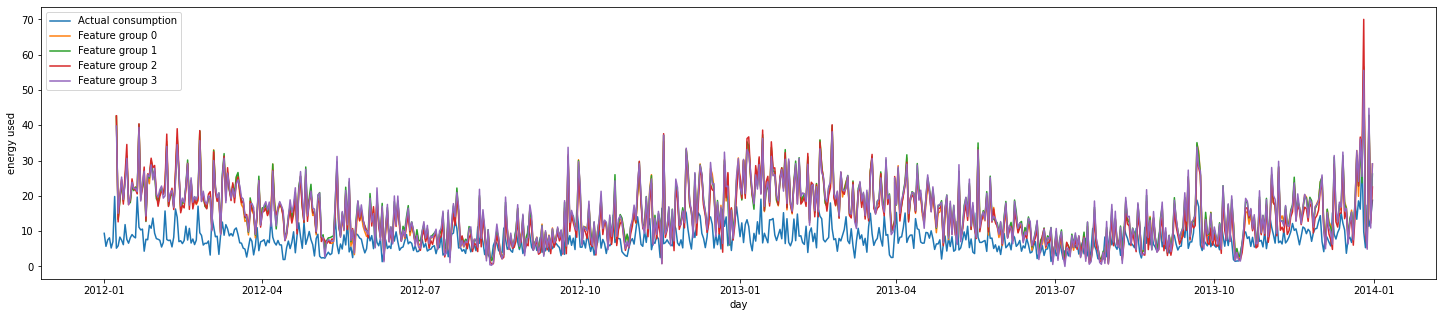

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               7.910601165910353       1.2345660283381696      103.8804460599857       10.192175727487518      -7.9153395487784035    
1               8.286208755239265       1.296978260299881       111.34605008533303      10.552063783228997      -8.556060659893621     
2               7.689596669962821       1.189155746314082       103.5494109685356       10.175923101543939      -7.886929098546661     
3               8.373958568115619       1.3090583266721654      112.56236360570159      10.609541159055919      -8.660448429133597     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

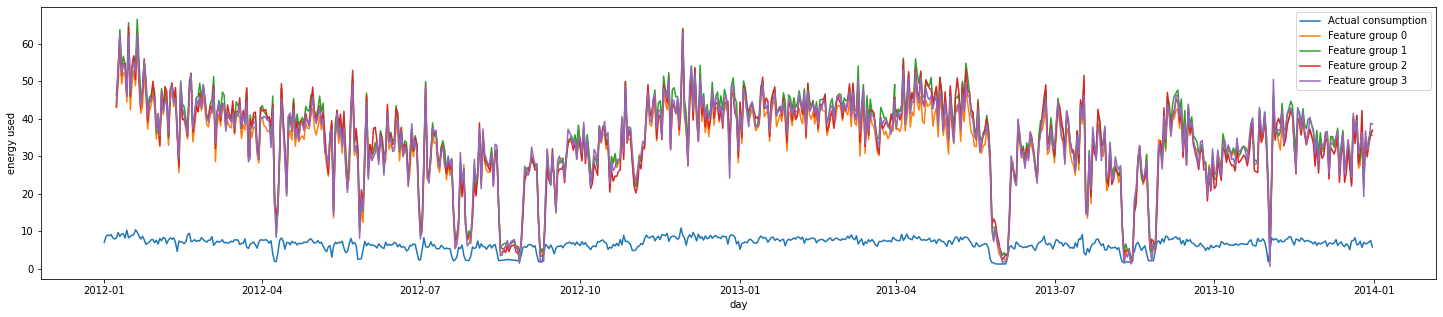

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               26.63691713213855       4.051864928023457       791.6734711988531       28.136692613007185      -274.2517924639517     
1               28.919274430692695      4.3927283401292705      938.9335716391847       30.64202296910543       -325.4516975753882     
2               27.794105864612856      4.222818857355611       874.9343359080689       29.579288968940226      -303.2002201769649     
3               27.89270400839207       4.214287809323266       873.07024369599         29.547762075933772      -302.5521060979169     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 2, "affluent", "household_1")
save_best_results(household_2_predictions, 2, "affluent", "household_2")
save_best_results(household_3_predictions, 2, "affluent", "household_3")

## Comfortable dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_comfortable_training.csv')
X_test = pd.read_csv(full_path + '/daily/daily_comfortable_testing.csv')


### 1.2 Fit and Plot results

#### Comfortable households - pearson



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.9936971068773249      0.13969554239915524     2.1360192869093173      1.461512670800126       0.6996360119992301     
1               1.0242466531171508      0.14756046791813088     2.1563939995731958      1.4684665469710898      0.6967709489412334     
2               1.0475064699990417      0.1533789788207529      2.163495653528008       1.470882610383306       0.6957723244829519     
3               1.0490535373013448      0.15319107959372258     2.177105066866463       1.4755016322818701      0.6938585881746042     


<Figure size 432x288 with 0 Axes>

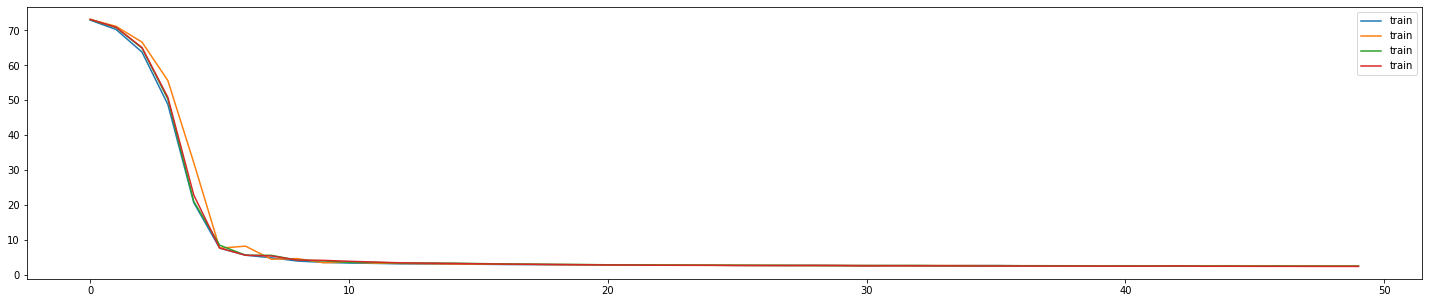

<Figure size 432x288 with 0 Axes>

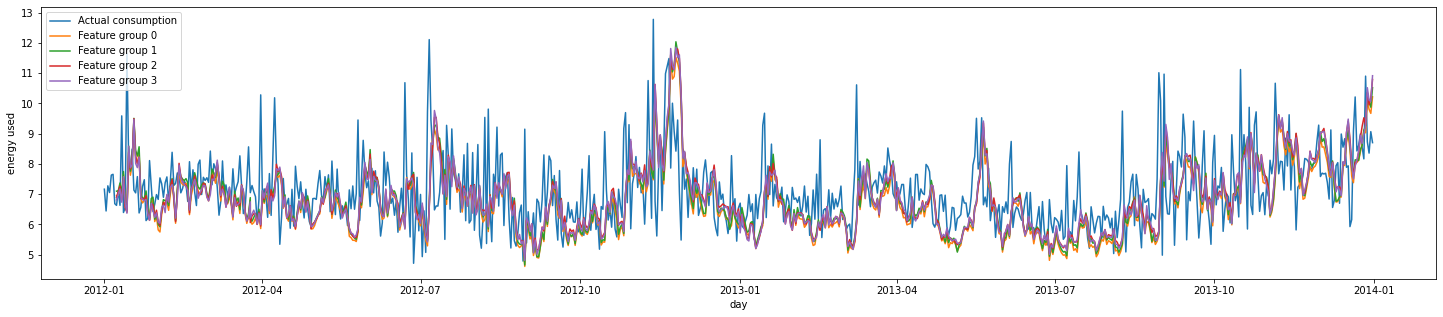

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.9874070149147306      0.13425578727171816     1.7802757483222118      1.3342697434635216      -0.2961774594597888    
1               0.9731632043135883      0.13311066795308185     1.7562385690400422      1.3252315152606513      -0.27867654702872047   
2               0.95908362013934        0.1313305243190222      1.728830482267514       1.3148499847007316      -0.25872135507884986   
3               0.961801437009743       0.13151154593546094     1.7536596121990227      1.324258136542503       -0.27679886839977796   


In [ ]:
#Pass in the dataset, run the model and then plot the results
household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

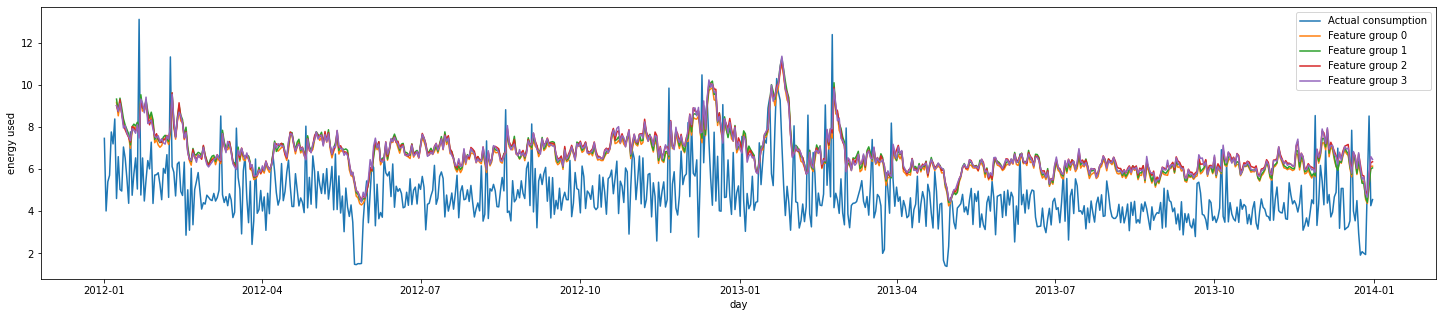

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.0675344828208226      0.5099212370443306      5.330215023969682       2.3087258442633853      -1.7664217707962546    
1               2.170067310014238       0.534436367028424       5.8129644701154595      2.4110090149386543      -2.016972371785501     
2               2.211106805540176       0.545872497892108       5.984726998971795       2.4463701680186904      -2.106118418820824     
3               2.1861168754739806      0.539607097812619       5.8641899510837705      2.421608959159957       -2.0435587824899426    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

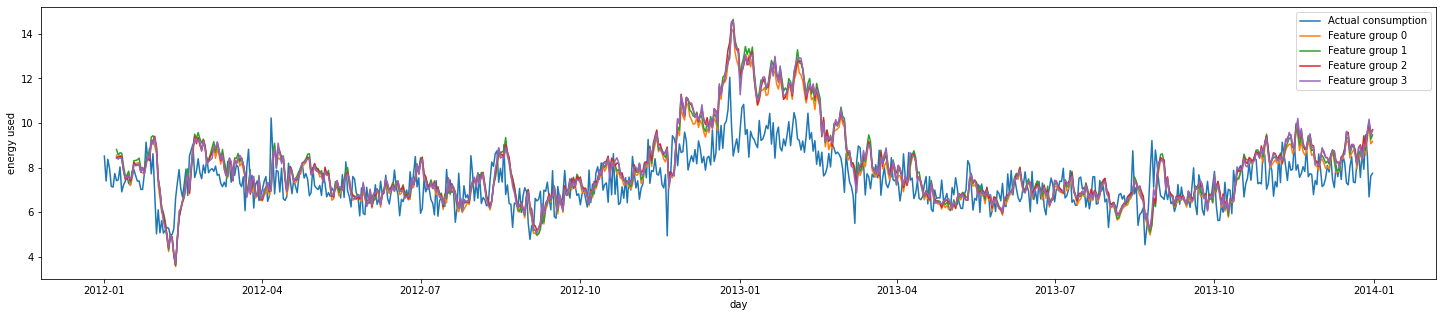

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.9045231682662165      0.1202456957399543      1.4541729980001958      1.2058909560985172      -0.28982112824117867   
1               0.9942027004952042      0.1321501170915875      1.763287720121426       1.3278884441553915      -0.563999441406577     
2               0.9803069430774992      0.13057311634492547     1.7049644814683476      1.3057428849005257      -0.5122679448201006    
3               0.9663217299978166      0.1283302406111144      1.6823804506349225      1.297066093394983       -0.49223638037084916   


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Comfortable households - mutual information



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.136724532065754       0.16569274130816072     2.409055491868927       1.5521132342290387      0.6612420499723575     
1               1.1637752063074693      0.17424764414485133     2.4420838863644585      1.5627168285919424      0.6565976442084493     
2               1.2445270571552516      0.1914376284721193      2.593314620438088       1.6103771671375895      0.6353317939078347     
3               1.2103611650784691      0.17980329911270299     2.6220864767948764      1.619285792192001       0.6312859364708381     


<Figure size 432x288 with 0 Axes>

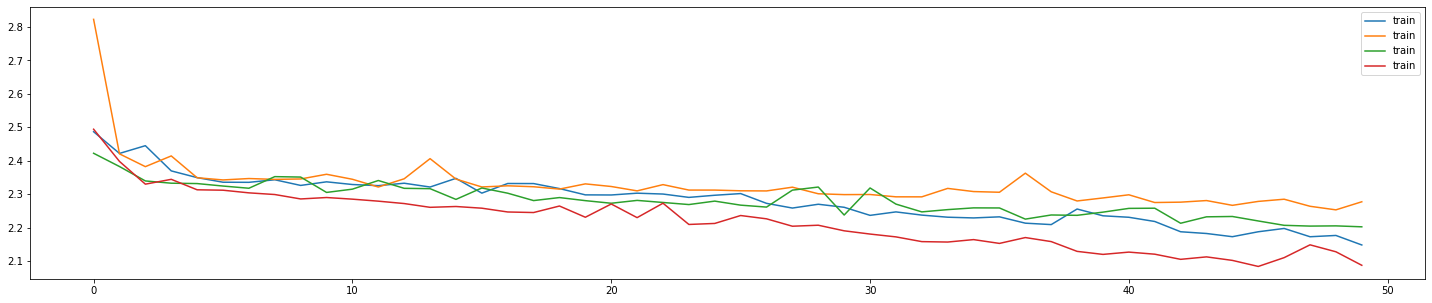

<Figure size 432x288 with 0 Axes>

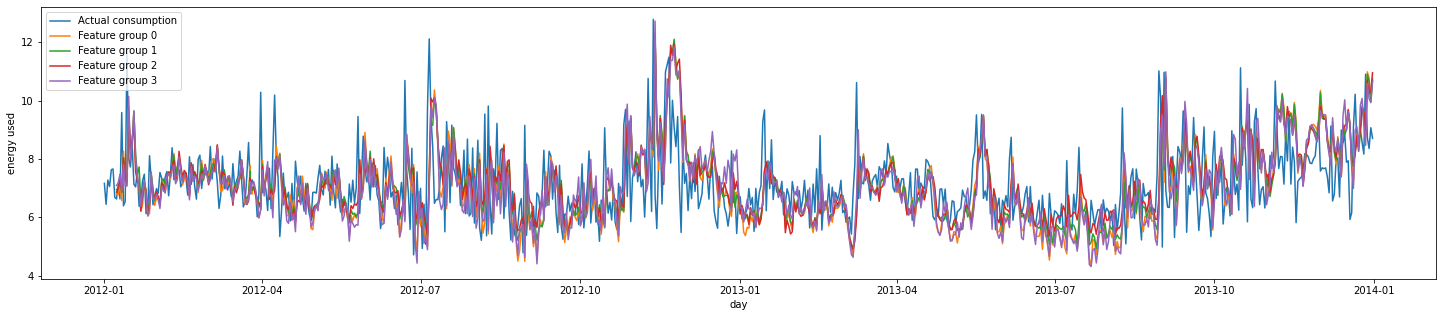

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.0568146968711665      0.14714698541289983     2.011687129838766       1.4183395678887218      -0.4646627162335726    
1               0.9707980256037436      0.13511726773498015     1.768557527436129       1.3298712446835328      -0.28764569476444546   
2               0.9640129102592785      0.13493100962936339     1.7475911230149201      1.3219648720805406      -0.2723805422495609    
3               1.0699865360098595      0.14915023309071446     2.0609776512694458      1.4356105499993532      -0.5005500010565431    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

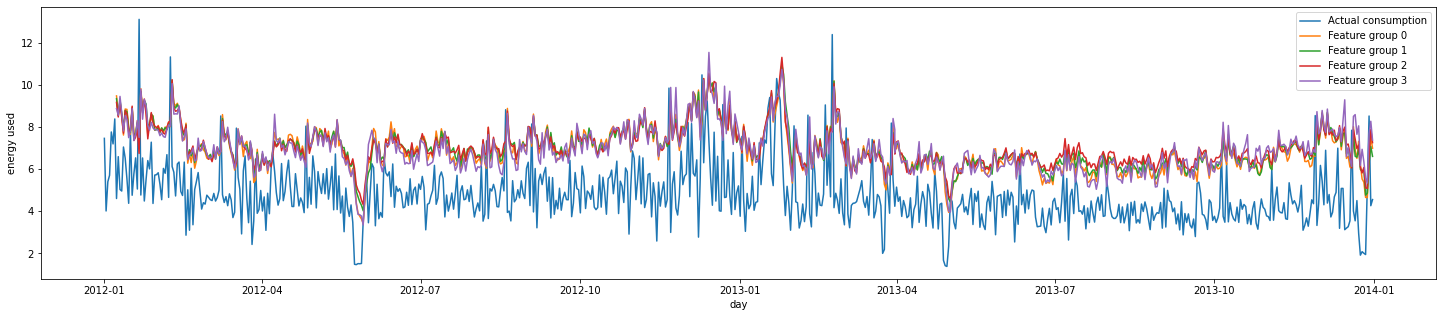

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.325058365864256       0.568229550906276       6.6329664029171305      2.575454601214537       -2.442559555191116     
1               2.394065482715701       0.588601619923852       6.904457110348117       2.6276333668052163      -2.583465278549084     
2               2.437312445712255       0.6016543989400972      7.1110087903488255      2.6666474814547247      -2.6906671572310707    
3               2.3323512662233084      0.5746841982708308      6.799945224552574       2.607670459347303       -2.5292228221244204    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

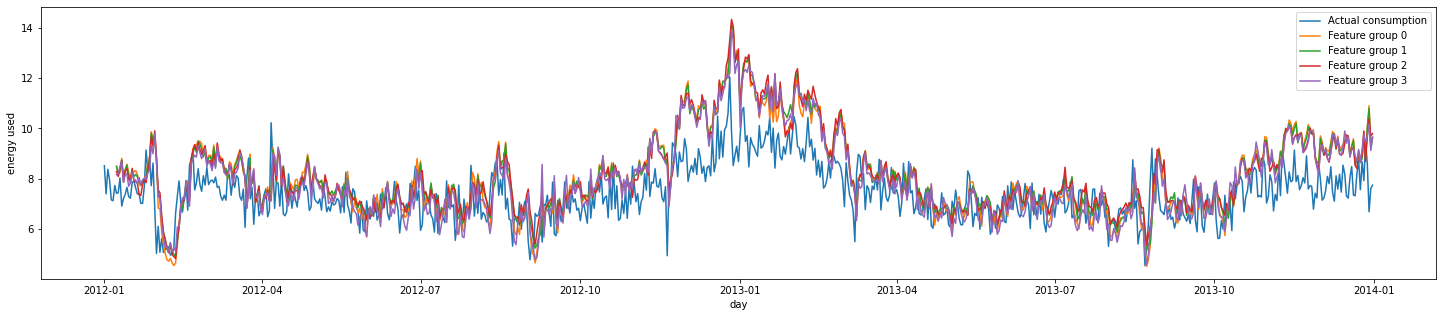

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.024590985128515       0.13851024513529953     1.7068112112878944      1.306449850276655       -0.513905955663845     
1               1.005625129201665       0.13603501407770882     1.6541788674709061      1.2861488512108177      -0.467222164136039     
2               1.0005766078527865      0.1354411299408932      1.6780761247354212      1.295405776093121       -0.48841853304756144   
3               0.9711544213949912      0.1308890942649201      1.546295297980314       1.24350122556446        -0.37153168747995813   


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

save_best_results(household_1_predictions, 0, "comfortable", "household_1")
save_best_results(household_2_predictions, 0, "comfortable", "household_2")
save_best_results(household_3_predictions, 0, "comfortable", "household_3")

## Adversity dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_adversity_training.csv')
X_test = pd.read_csv(full_path + '/daily/daily_adversity_testing.csv')

### 1.2 Fit and Plot results

#### Adversity households - pearson


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.144633698128782       1.6949359340645576      99.40082642283032       9.969996310071048       -31.710626746616853    
1               9.282737041055551       1.7370389437313054      101.16583240627847      10.058122707855501      -32.2914514138538      
2               8.197724919487447       1.5525462300274695      77.74585620845318       8.817361068281892       -24.584452112228664    
3               8.469014683025119       1.6009673951866952      84.02534773063859       9.166534117682572       -26.650894723751808    


<Figure size 432x288 with 0 Axes>

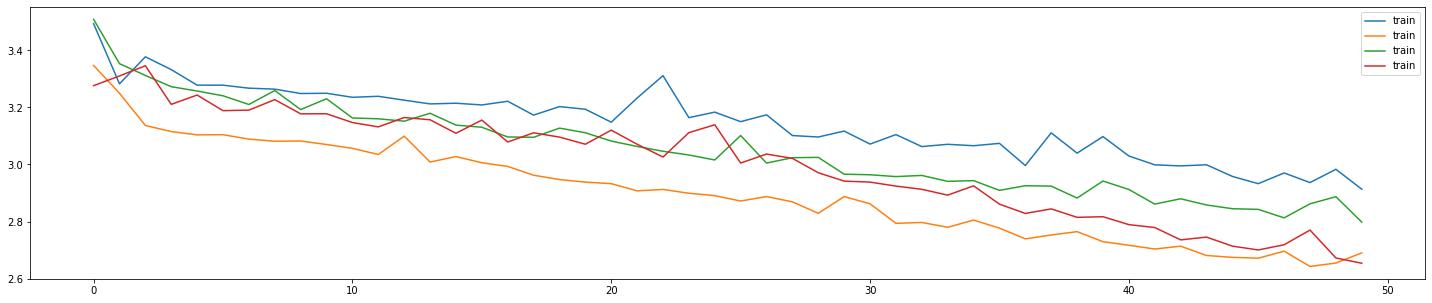

<Figure size 432x288 with 0 Axes>

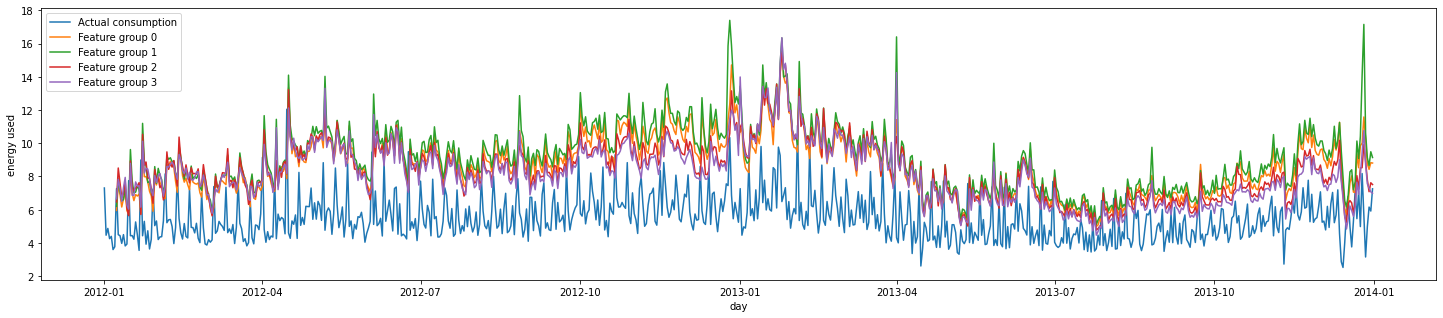

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.235884493809051       0.6411490087986887      13.175407845813368      3.629794463301382       -6.363735269501625     
1               3.6824732330420544      0.7263755060579803      16.92091194508134       4.113503609464971       -8.457097460684695     
2               2.9707944403482816      0.5922367169754551      11.422418482274596      3.3797068633647203      -5.38398953757322      
3               2.795084932382437       0.5570996579403362      10.459735555117598      3.234151442823542       -4.8459460624100865    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

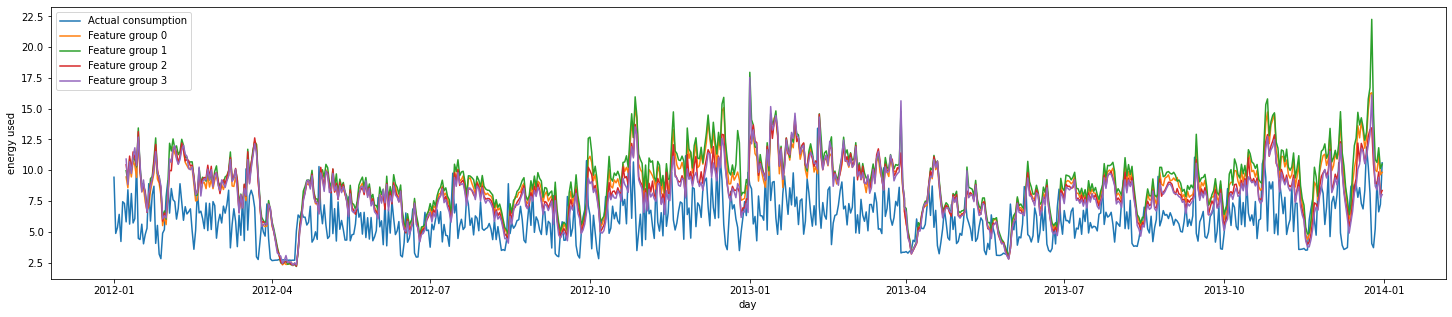

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.95074142875544        0.5671713285055133      12.52768501798867       3.5394469932446606      -2.8673634941813466    
1               3.3712274991020093      0.6456919233998927      16.18726501850791       4.023340032672842       -3.9970954500632105    
2               2.6981994914715806      0.5209544453914934      10.67388518693369       3.2670912425173695      -2.2950855528181133    
3               2.597726803671512       0.5019464973526476      10.278858329052797      3.2060658647402733      -2.1731386450537444    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

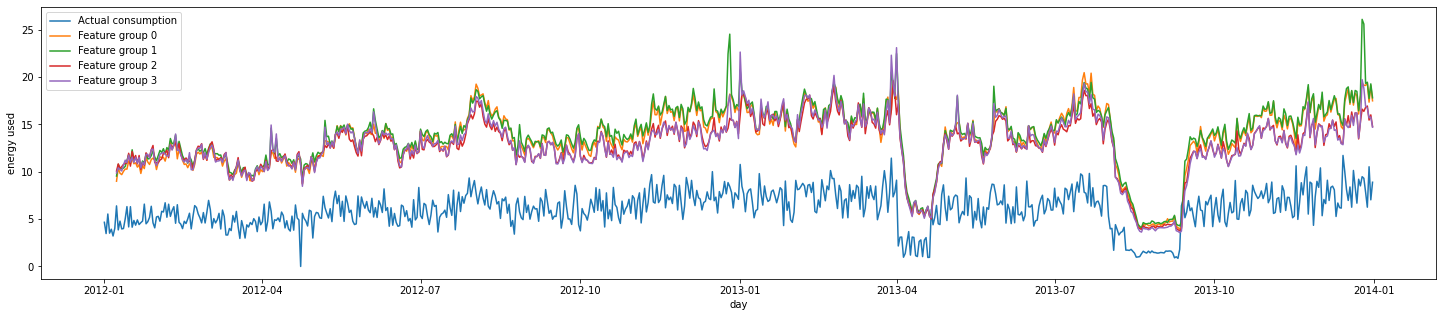

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               7.429805560411501       5.155357396208967       60.488233587330114      7.777418182618838       -14.688727829893919    
1               7.775920514598037       5.3558283969849185      65.73979323852825       8.10800796981159        -16.050815713170405    
2               6.655752097802386       4.945650245136917       48.27049860559934       6.947697359960301       -11.519835179897647    
3               6.762788351111505       4.954934243948957       50.37813561435725       7.097755674461981       -12.06648932126673     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

#### Adversity households - mutual information 


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               9.469152075962894       1.7826478779174506      103.9381387562299       10.195005579019067      -33.20375648720185     
1               8.812850936386695       1.6630044085125082      90.164332326245         9.495490104583597       -28.67109959464401     
2               9.491011949102003       1.761179206805896       106.9098456007228       10.339721737103122      -34.18167987968028     
3               9.362529382941688       1.7640707653729266      102.31566047604376      10.115120388608519      -32.669834553777434    


<Figure size 432x288 with 0 Axes>

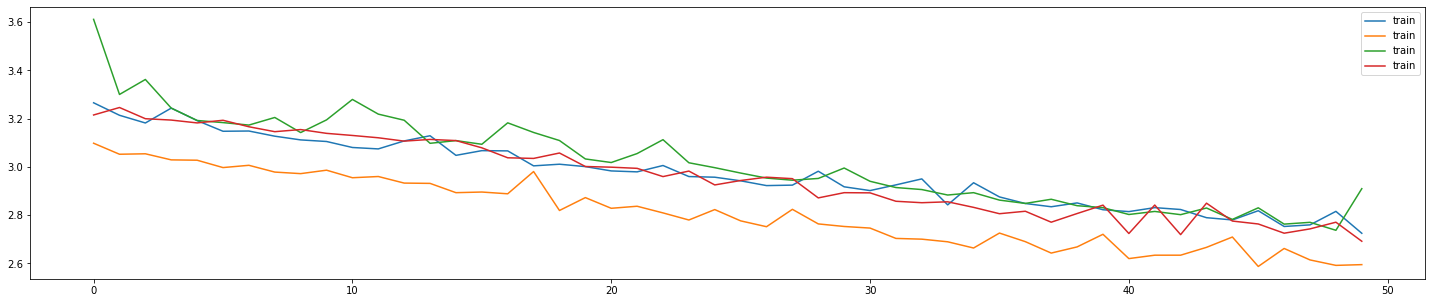

<Figure size 432x288 with 0 Axes>

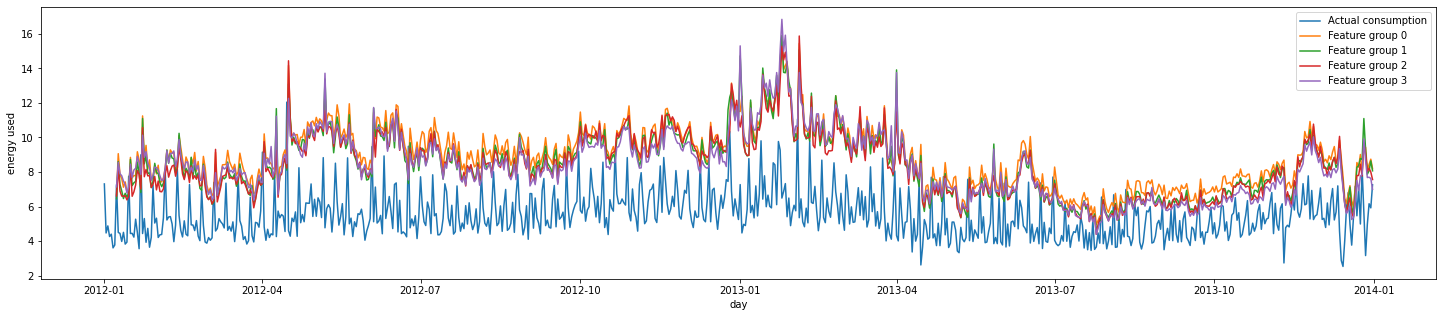

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.441786815977709       0.6848525271863115      14.662038691364431      3.8291041630340157      -7.1946132292751415    
1               3.043170658269574       0.6036483093884518      12.127345016829802      3.48243377780968        -5.777972968345058     
2               2.951132391811772       0.5851164082498519      11.454049040369702      3.384383110755888       -5.4016678560711915    
3               2.966571357018076       0.5894399949245169      11.807380289444042      3.43618688220592        -5.5991446864717425    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, 500, acorn_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

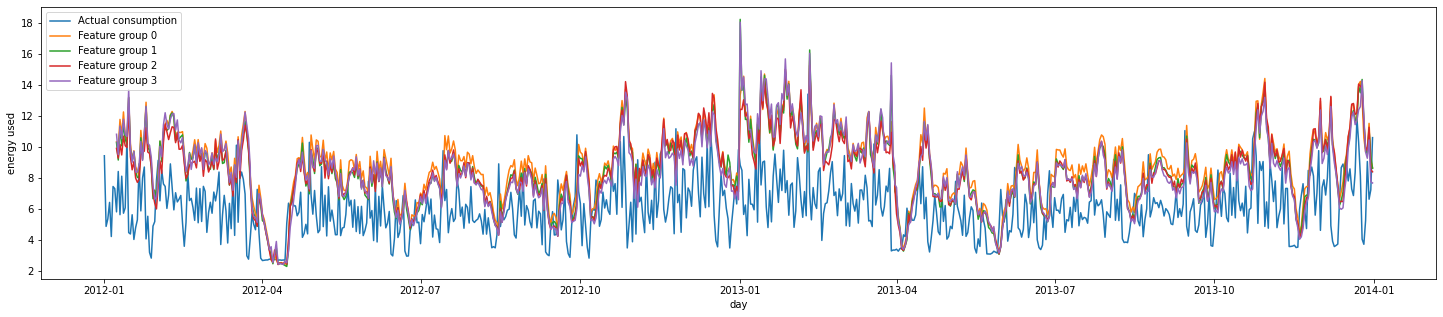

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.130379425945834       0.60585804222175        13.571325367708369      3.6839279807982632      -3.189540862447317     
1               2.8065215056440787      0.5422363582394534      11.528764647296384      3.3954034586918214      -2.5589914230714617    
2               2.7584533143811054      0.5343148644585727      11.126892793678612      3.3356997457323123      -2.4349314284444663    
3               2.7859149478970946      0.5398415648263319      11.652702395599377      3.4136054832975904      -2.597251670088351     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

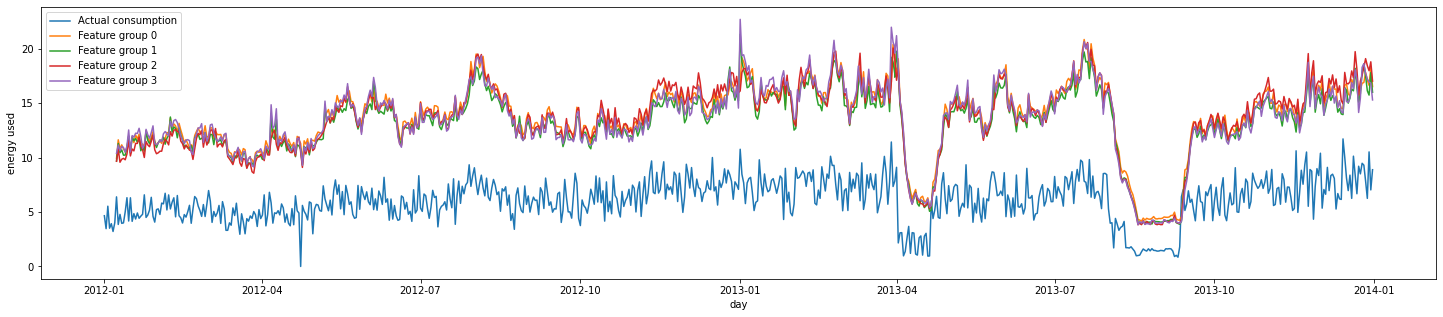

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               7.623818554034904       5.324843269560635       63.25559746743477       7.95333876227052        -15.40649418123824     
1               7.0844354818648885      5.041641473570849       54.88165140645116       7.408215129601135       -13.234558371221429    
2               7.495909491383998       4.996332831464999       61.8440969810234        7.864101791115334       -15.040395757631615    
3               7.410168266359441       5.100730966578448       60.42938047684542       7.773633672668491       -14.673463201096252    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 3, "adversity", "household_1")
save_best_results(household_2_predictions, 3, "adversity", "household_2")
save_best_results(household_3_predictions, 3, "adversity", "household_3")